In [534]:
import pandas as pd
import openpyxl
import numpy as np
import matplotlib.pyplot as plt
import pywt
from scipy.optimize import curve_fit
import math

In [535]:
def normalization (x,mu,sigma):
    x=(x-mu)/sigma
    return x

In [536]:
data=pd.read_csv('../max2021/AEPpeak.csv')
Data=data
Data

DAY          TIME         MV  TEMP   MAX
0      1/1/2021   12:00:00 PM  15407.293  38.1  54.3
1      1/2/2021    6:00:00 PM  14430.916  42.9  55.9
2      1/3/2021    6:00:00 PM  15272.795  38.0  39.2
3      1/4/2021    6:00:00 PM  16854.471  35.5  42.3
4      1/5/2021    6:00:00 PM  17092.317  33.0  36.1
..          ...           ...        ...   ...   ...
322  11/19/2021    7:00:00 AM  16951.611  35.5  41.2
323  11/20/2021    8:00:00 AM  16158.182  37.4  51.8
324  11/21/2021    6:00:00 PM  14790.596  43.0  49.5
325  11/22/2021    6:00:00 PM  16623.140  38.6  45.0
326  11/23/2021    7:00:00 AM  17745.415  30.7  41.2

[327 rows x 5 columns]

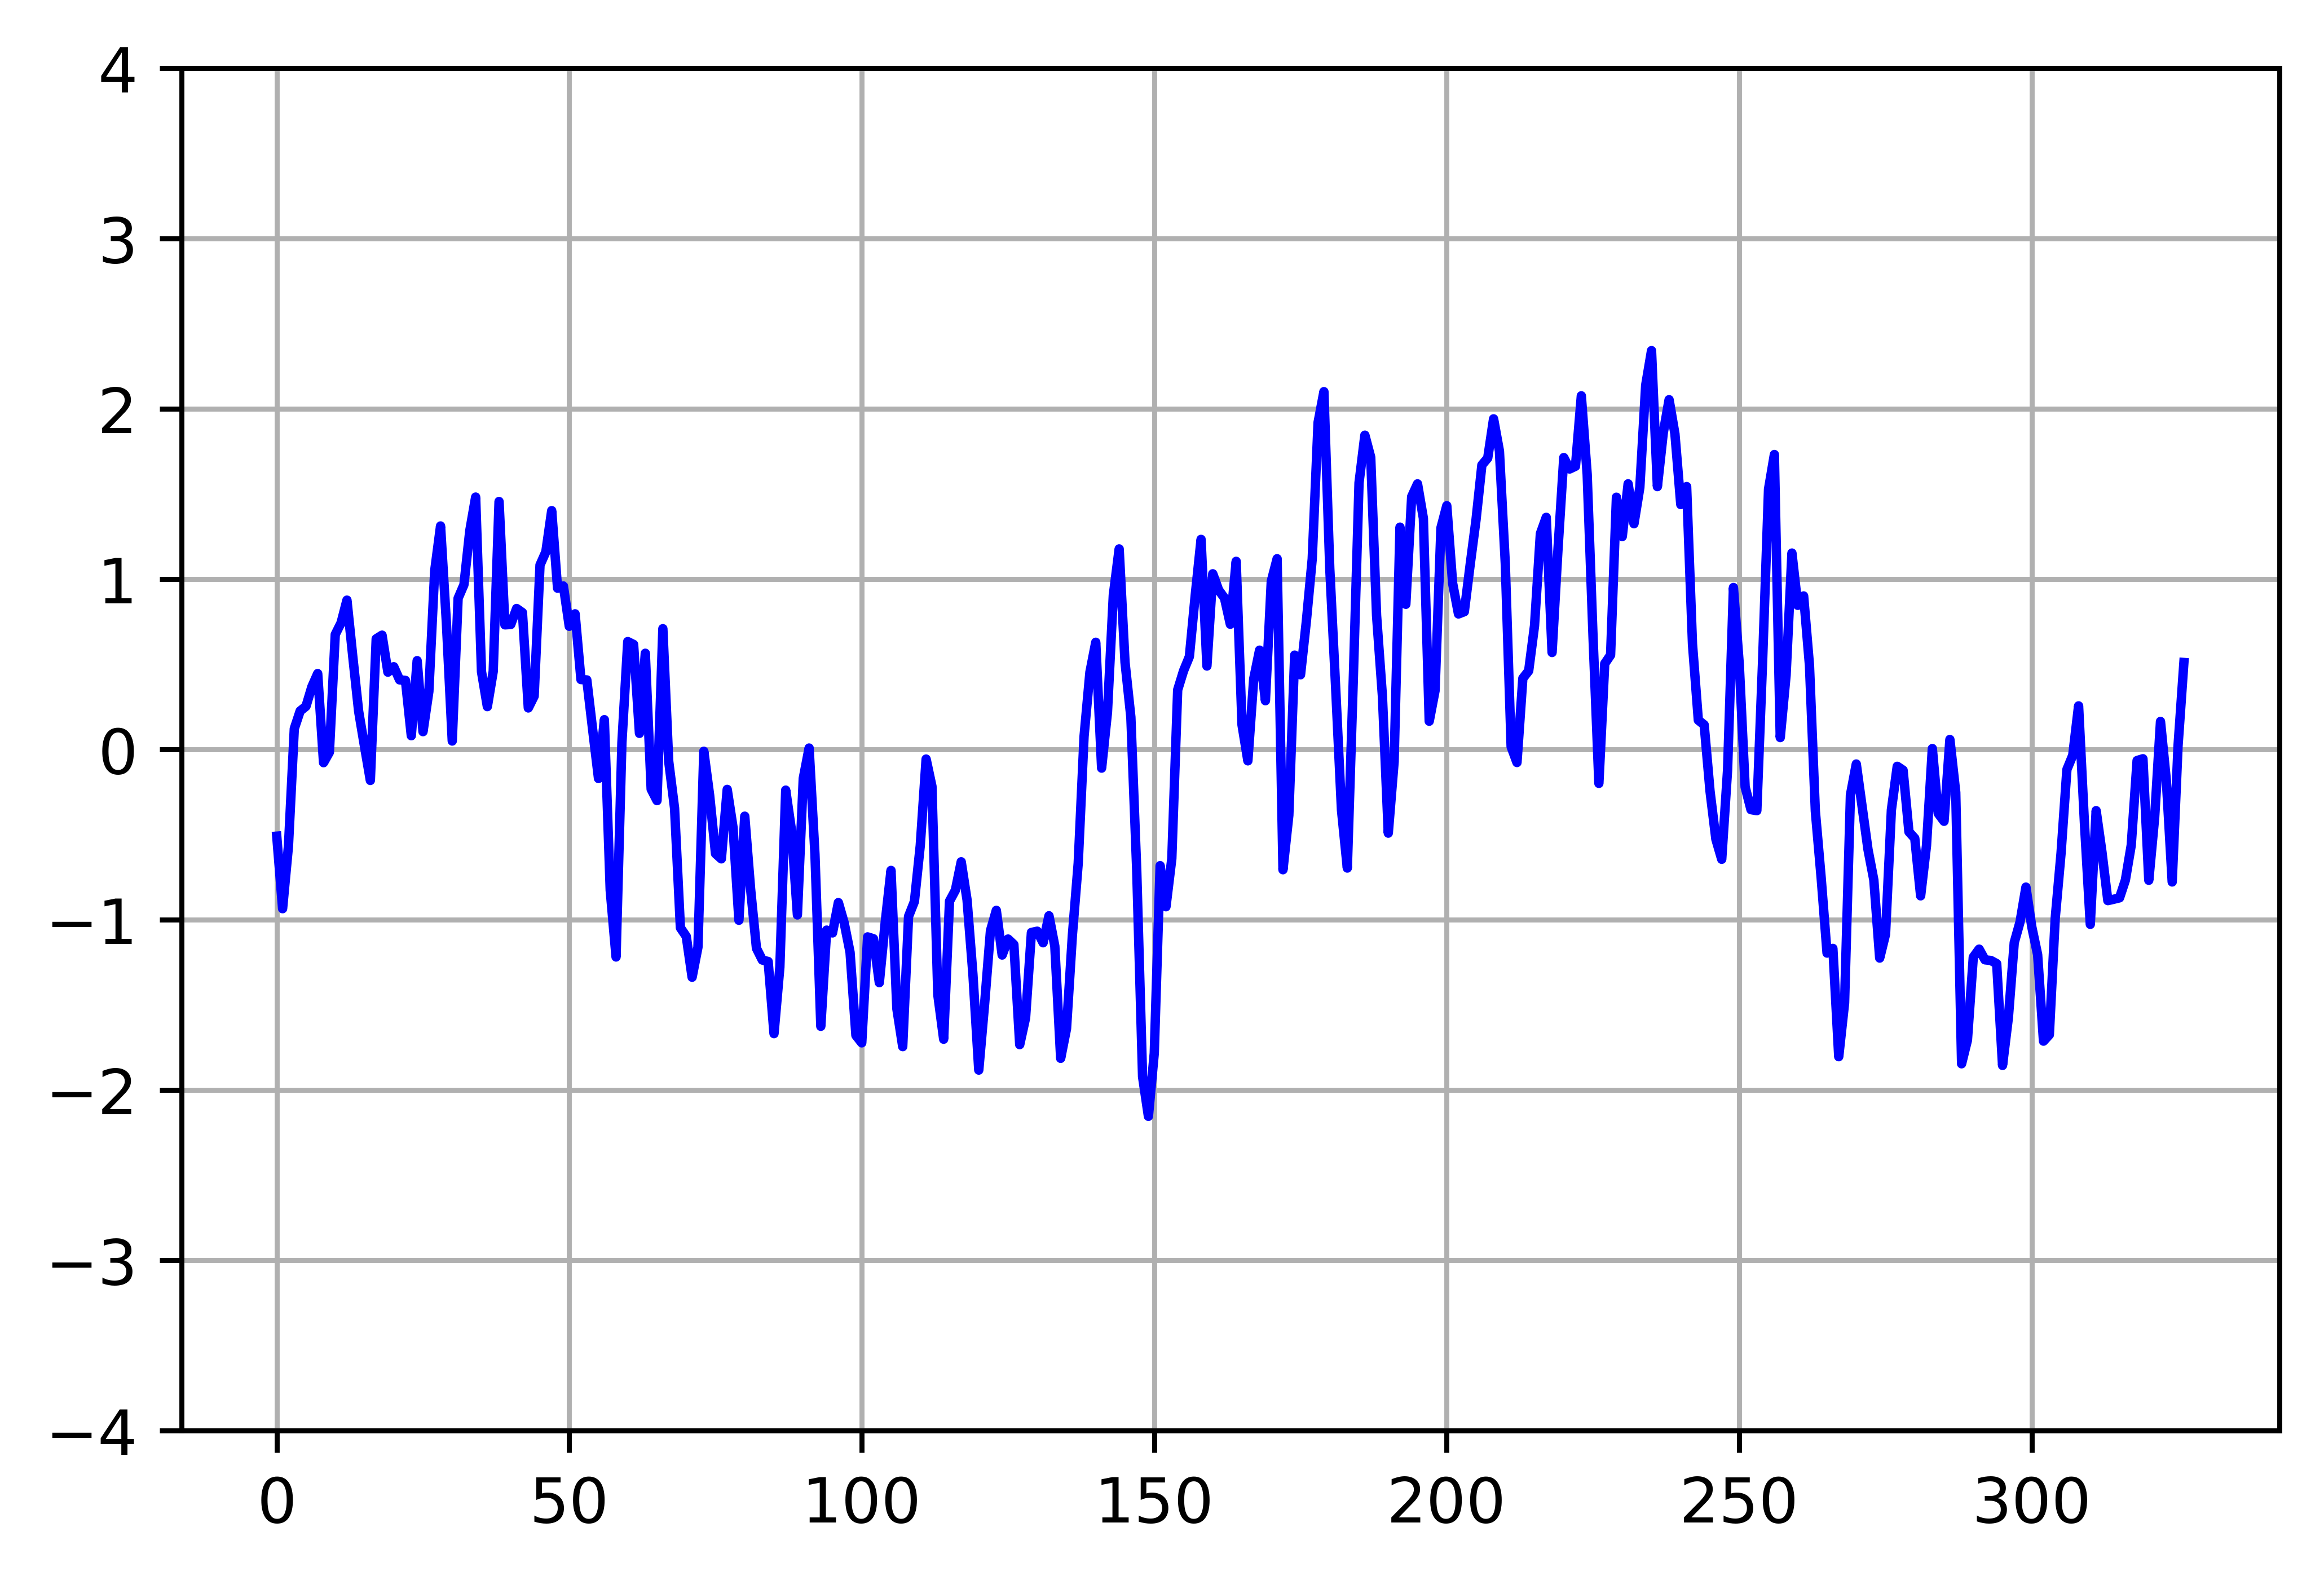

In [537]:
AEP=data['MV'].values
aep=normalization(AEP,AEP.mean(),AEP.std())
plt.figure(dpi=800)
plt.plot(aep,'b',label='AEP_MV')
# plt.title('AEP_MV')
# plt.legend(loc="upper left")
plt.ylim(-4,4)
plt.grid()
plt.savefig('../picture/2.tiff')

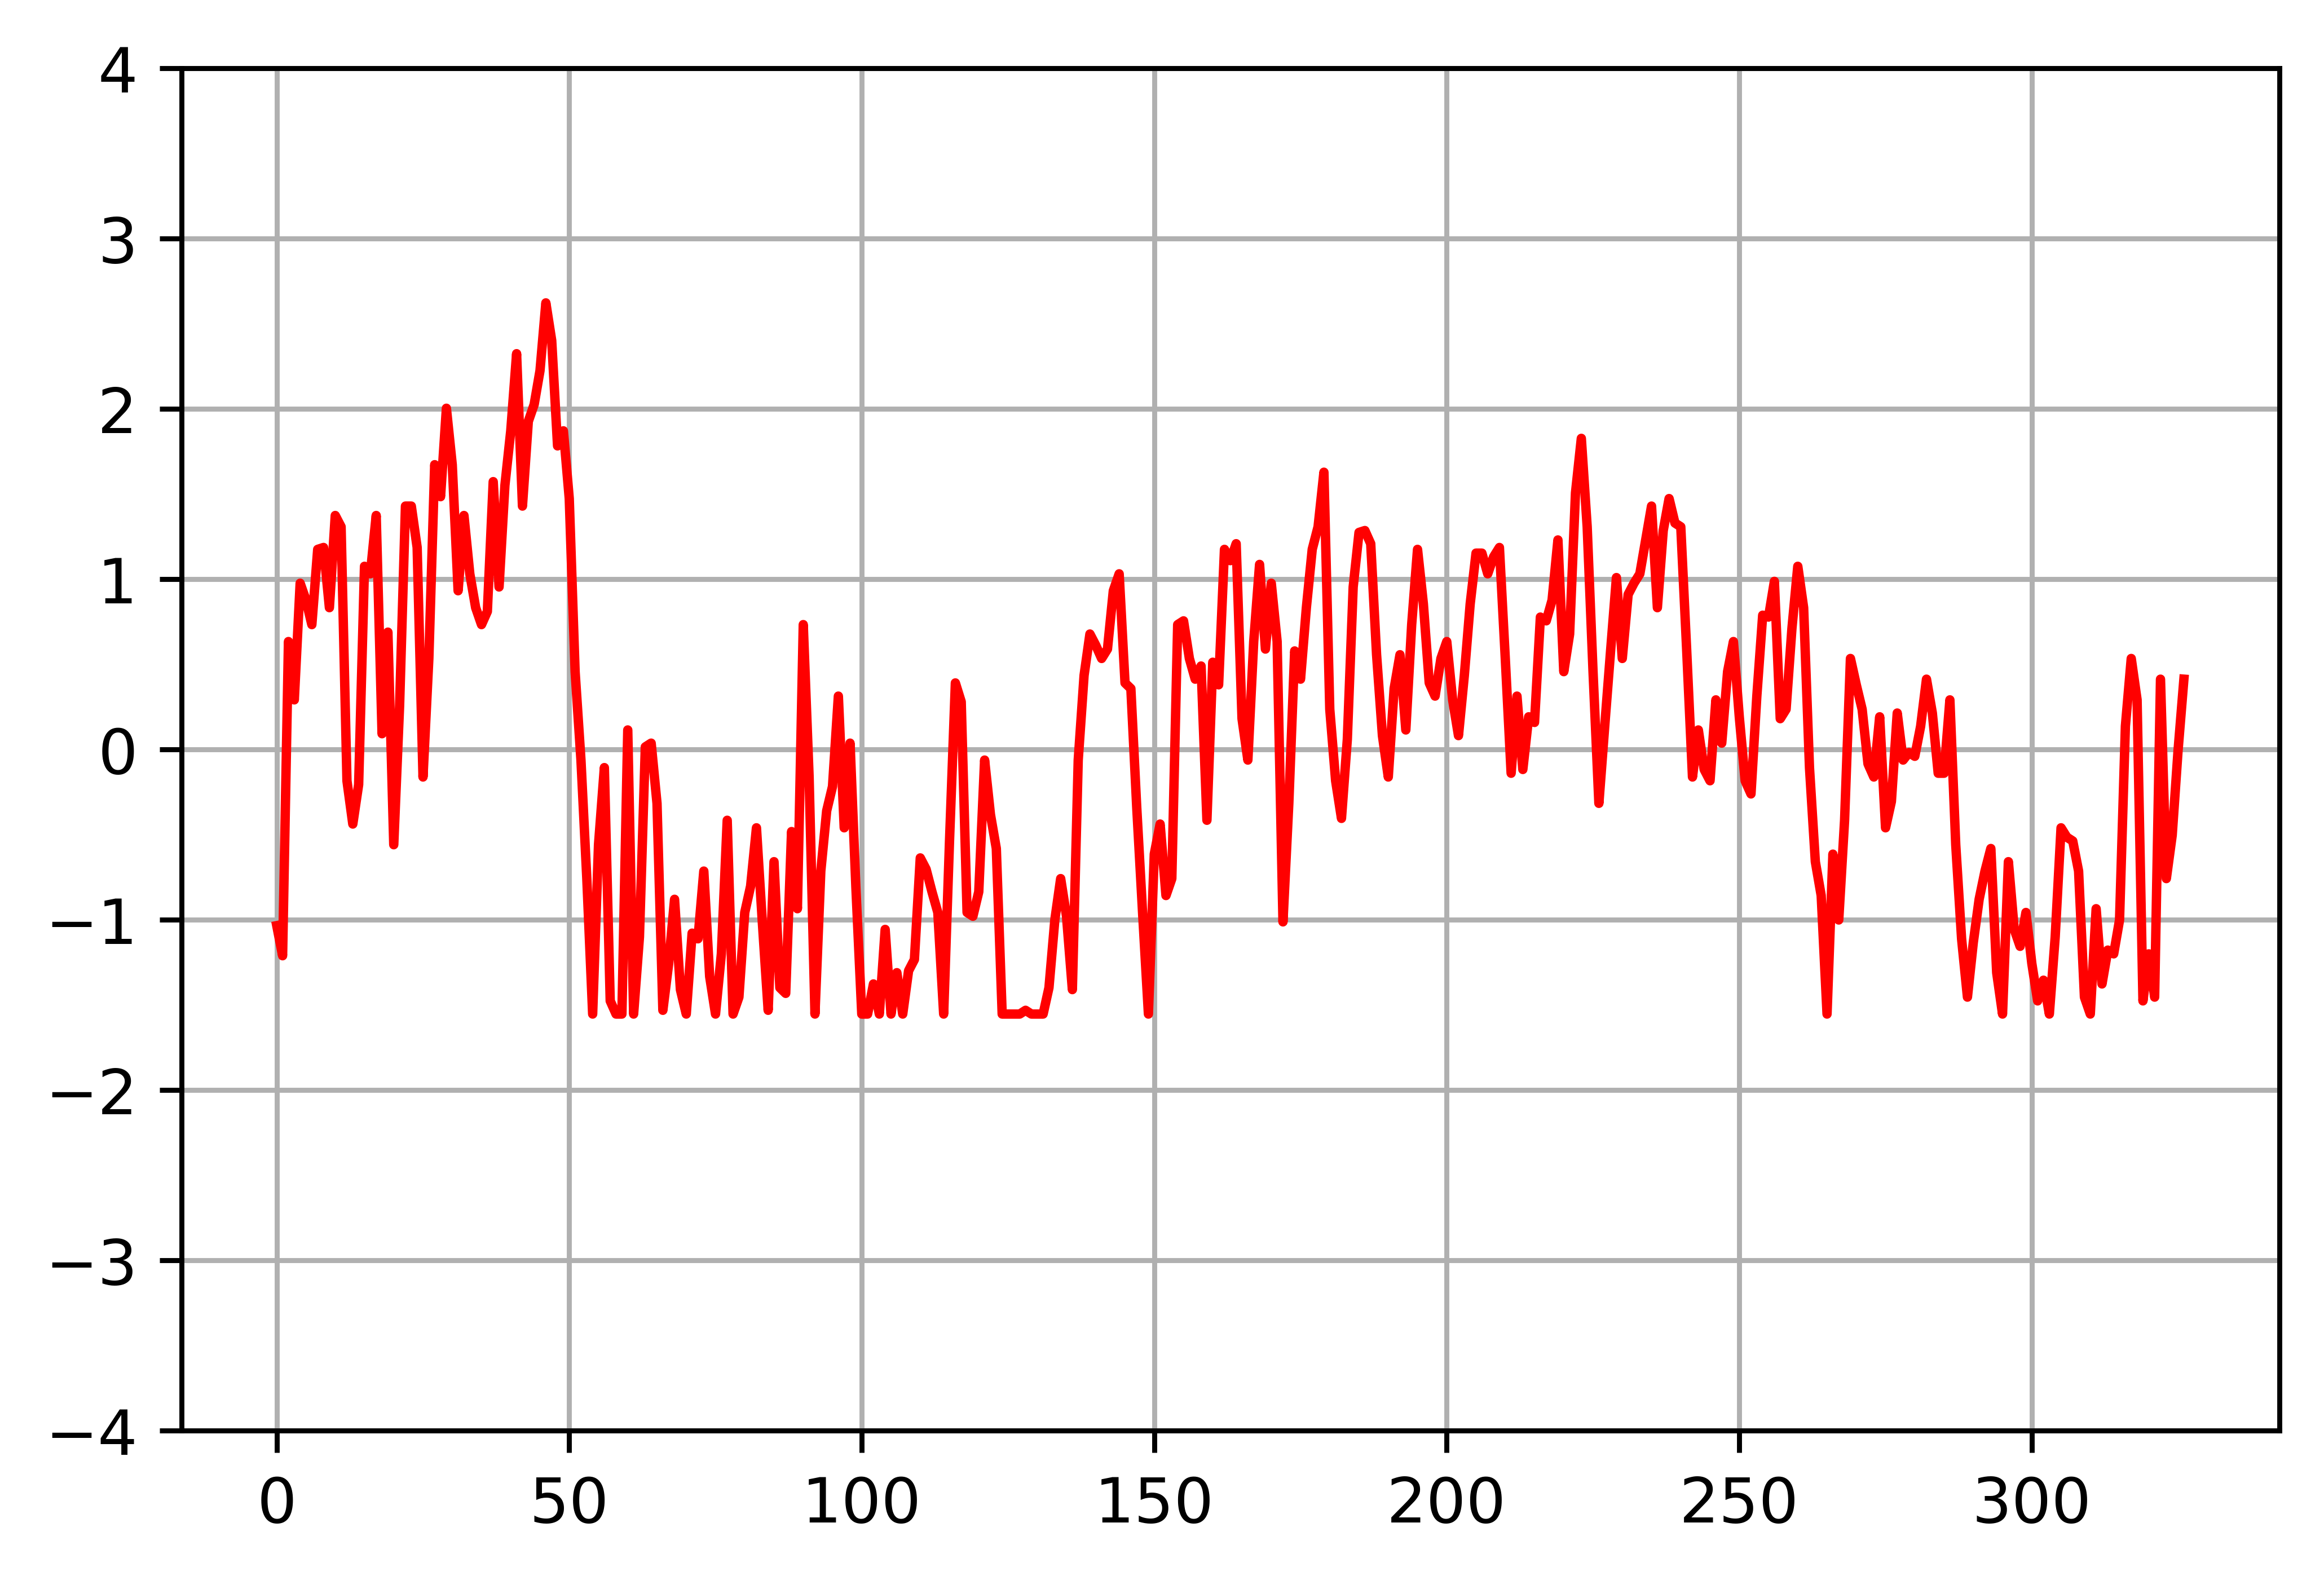

In [538]:
for i in range(len(Data)):
    if Data['MAX'].values[i] >= 59 and Data['MAX'].values[i] <= 64.4:
        Data['MAX'].values[i]=0
    elif Data['MAX'].values[i] < 59:
        Data['MAX'].values[i] =59- Data['MAX'].values[i]
    else:
        Data['MAX'].values[i]=Data['MAX'].values[i]-64.4
# print(Data[:60])
temp=normalization(Data['MAX'].values,Data['MAX'].values.mean(),Data['MAX'].values.std())
mv=normalization(Data['MV'].values,Data['MV'].values.mean(),Data['MV'].values.std())
plt.figure(dpi=800)
plt.plot(temp,'r',label='TEMP')
plt.ylim(-4,4)
plt.grid()
# plt.plot(mv,'r',label='MV')
# plt.title('AEP2021year-temp-mv')
# plt.legend(loc="upper left")
plt.savefig('../picture/1.tiff')

<Figure size 720x1080 with 0 Axes>

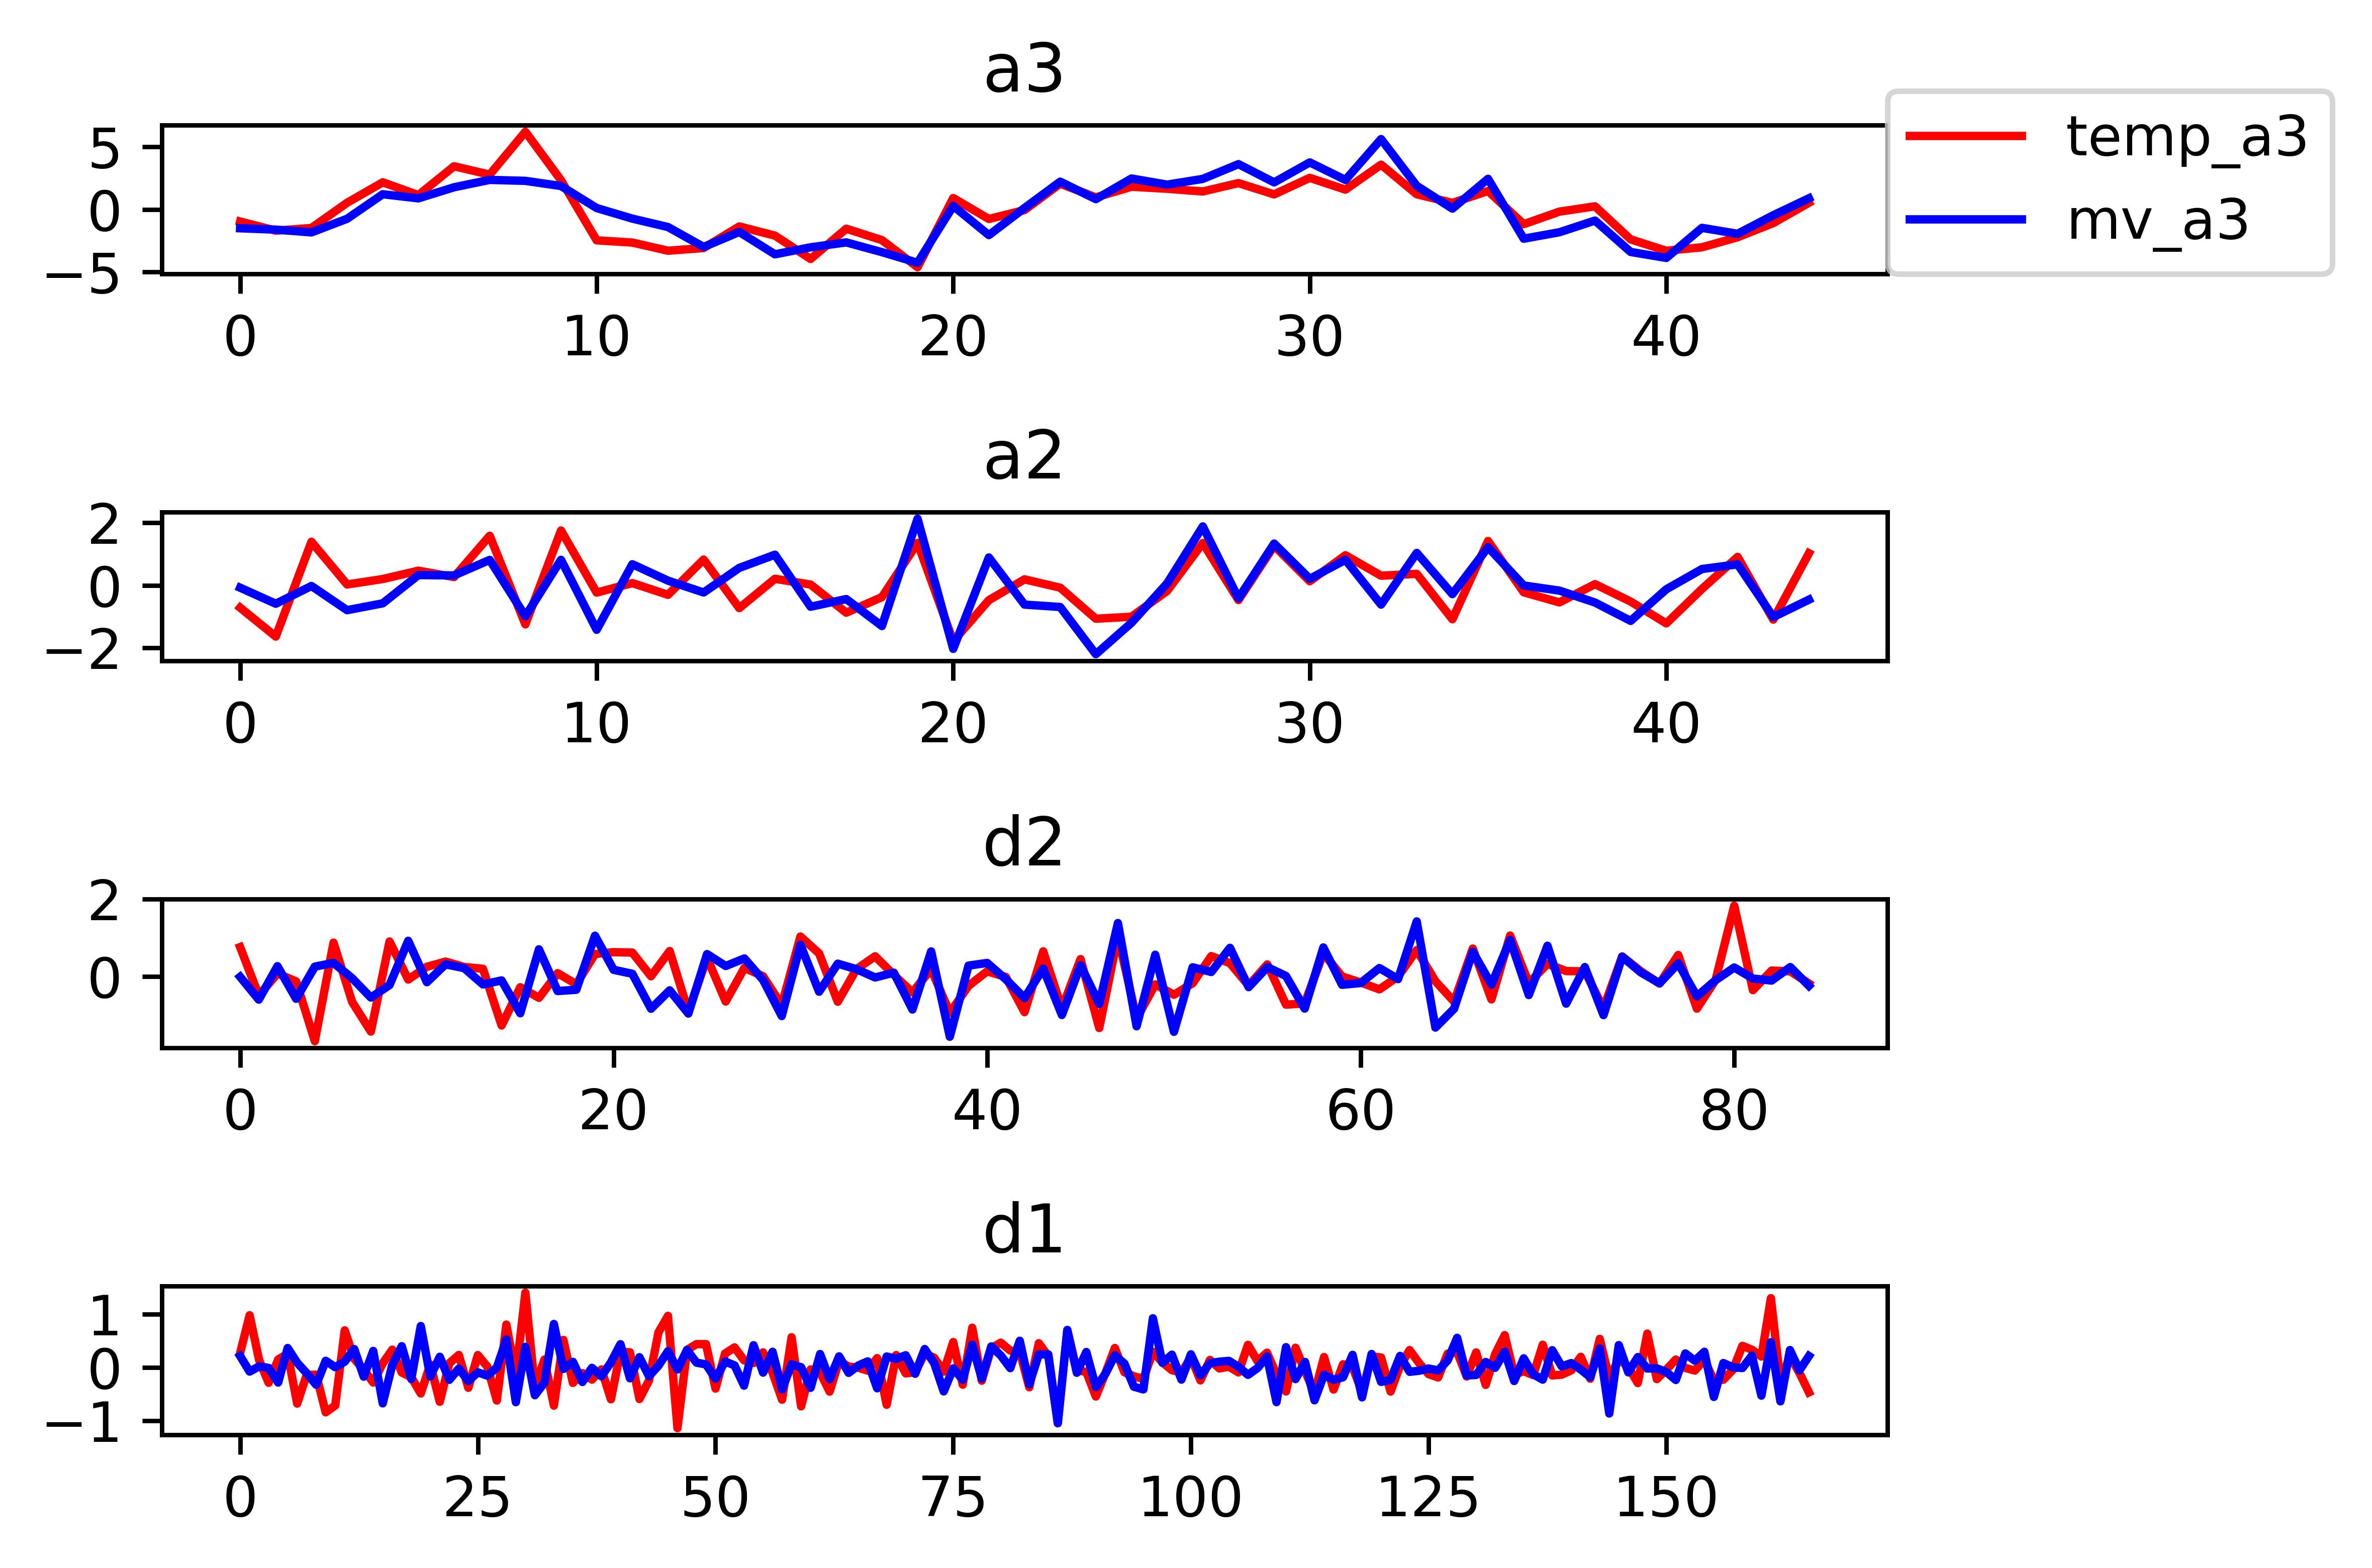

In [539]:
t_a3,t_a2,t_d2,t_d1=pywt.wavedec(temp,'db3',mode='sym',level=3)
a3,a2,d2,d1=pywt.wavedec(mv,'db3',mode='sym',level=3)
plt.figure(figsize=(10,15))
plt.figure(dpi=800)
plt.subplot(4,1,1)
plt.plot(t_a3,'r',label='temp_a3')
plt.plot(a3,'b',label='mv_a3')
plt.title('a3')
plt.legend(bbox_to_anchor=(1, 0), loc=3, borderaxespad=0)

plt.tight_layout()
plt.subplot(4,1,2)
plt.plot(t_a2,'r',label='temp_a2')
plt.plot(a2,'b',label='mv_a2')
plt.title('a2')
plt.subplot(4,1,3)
plt.plot(t_d2,'r',label='temp_d2')
plt.plot(d2,'b',label='nv_d2')
plt.title('d2')
plt.subplot(4,1,4)
plt.plot(t_d1,'r',label='temp_d1')
plt.plot(d1,'b',label='mv_d1')
plt.title('d1')
plt.tight_layout()
# plt.savefig('../picture/AEP_a3.tiff')

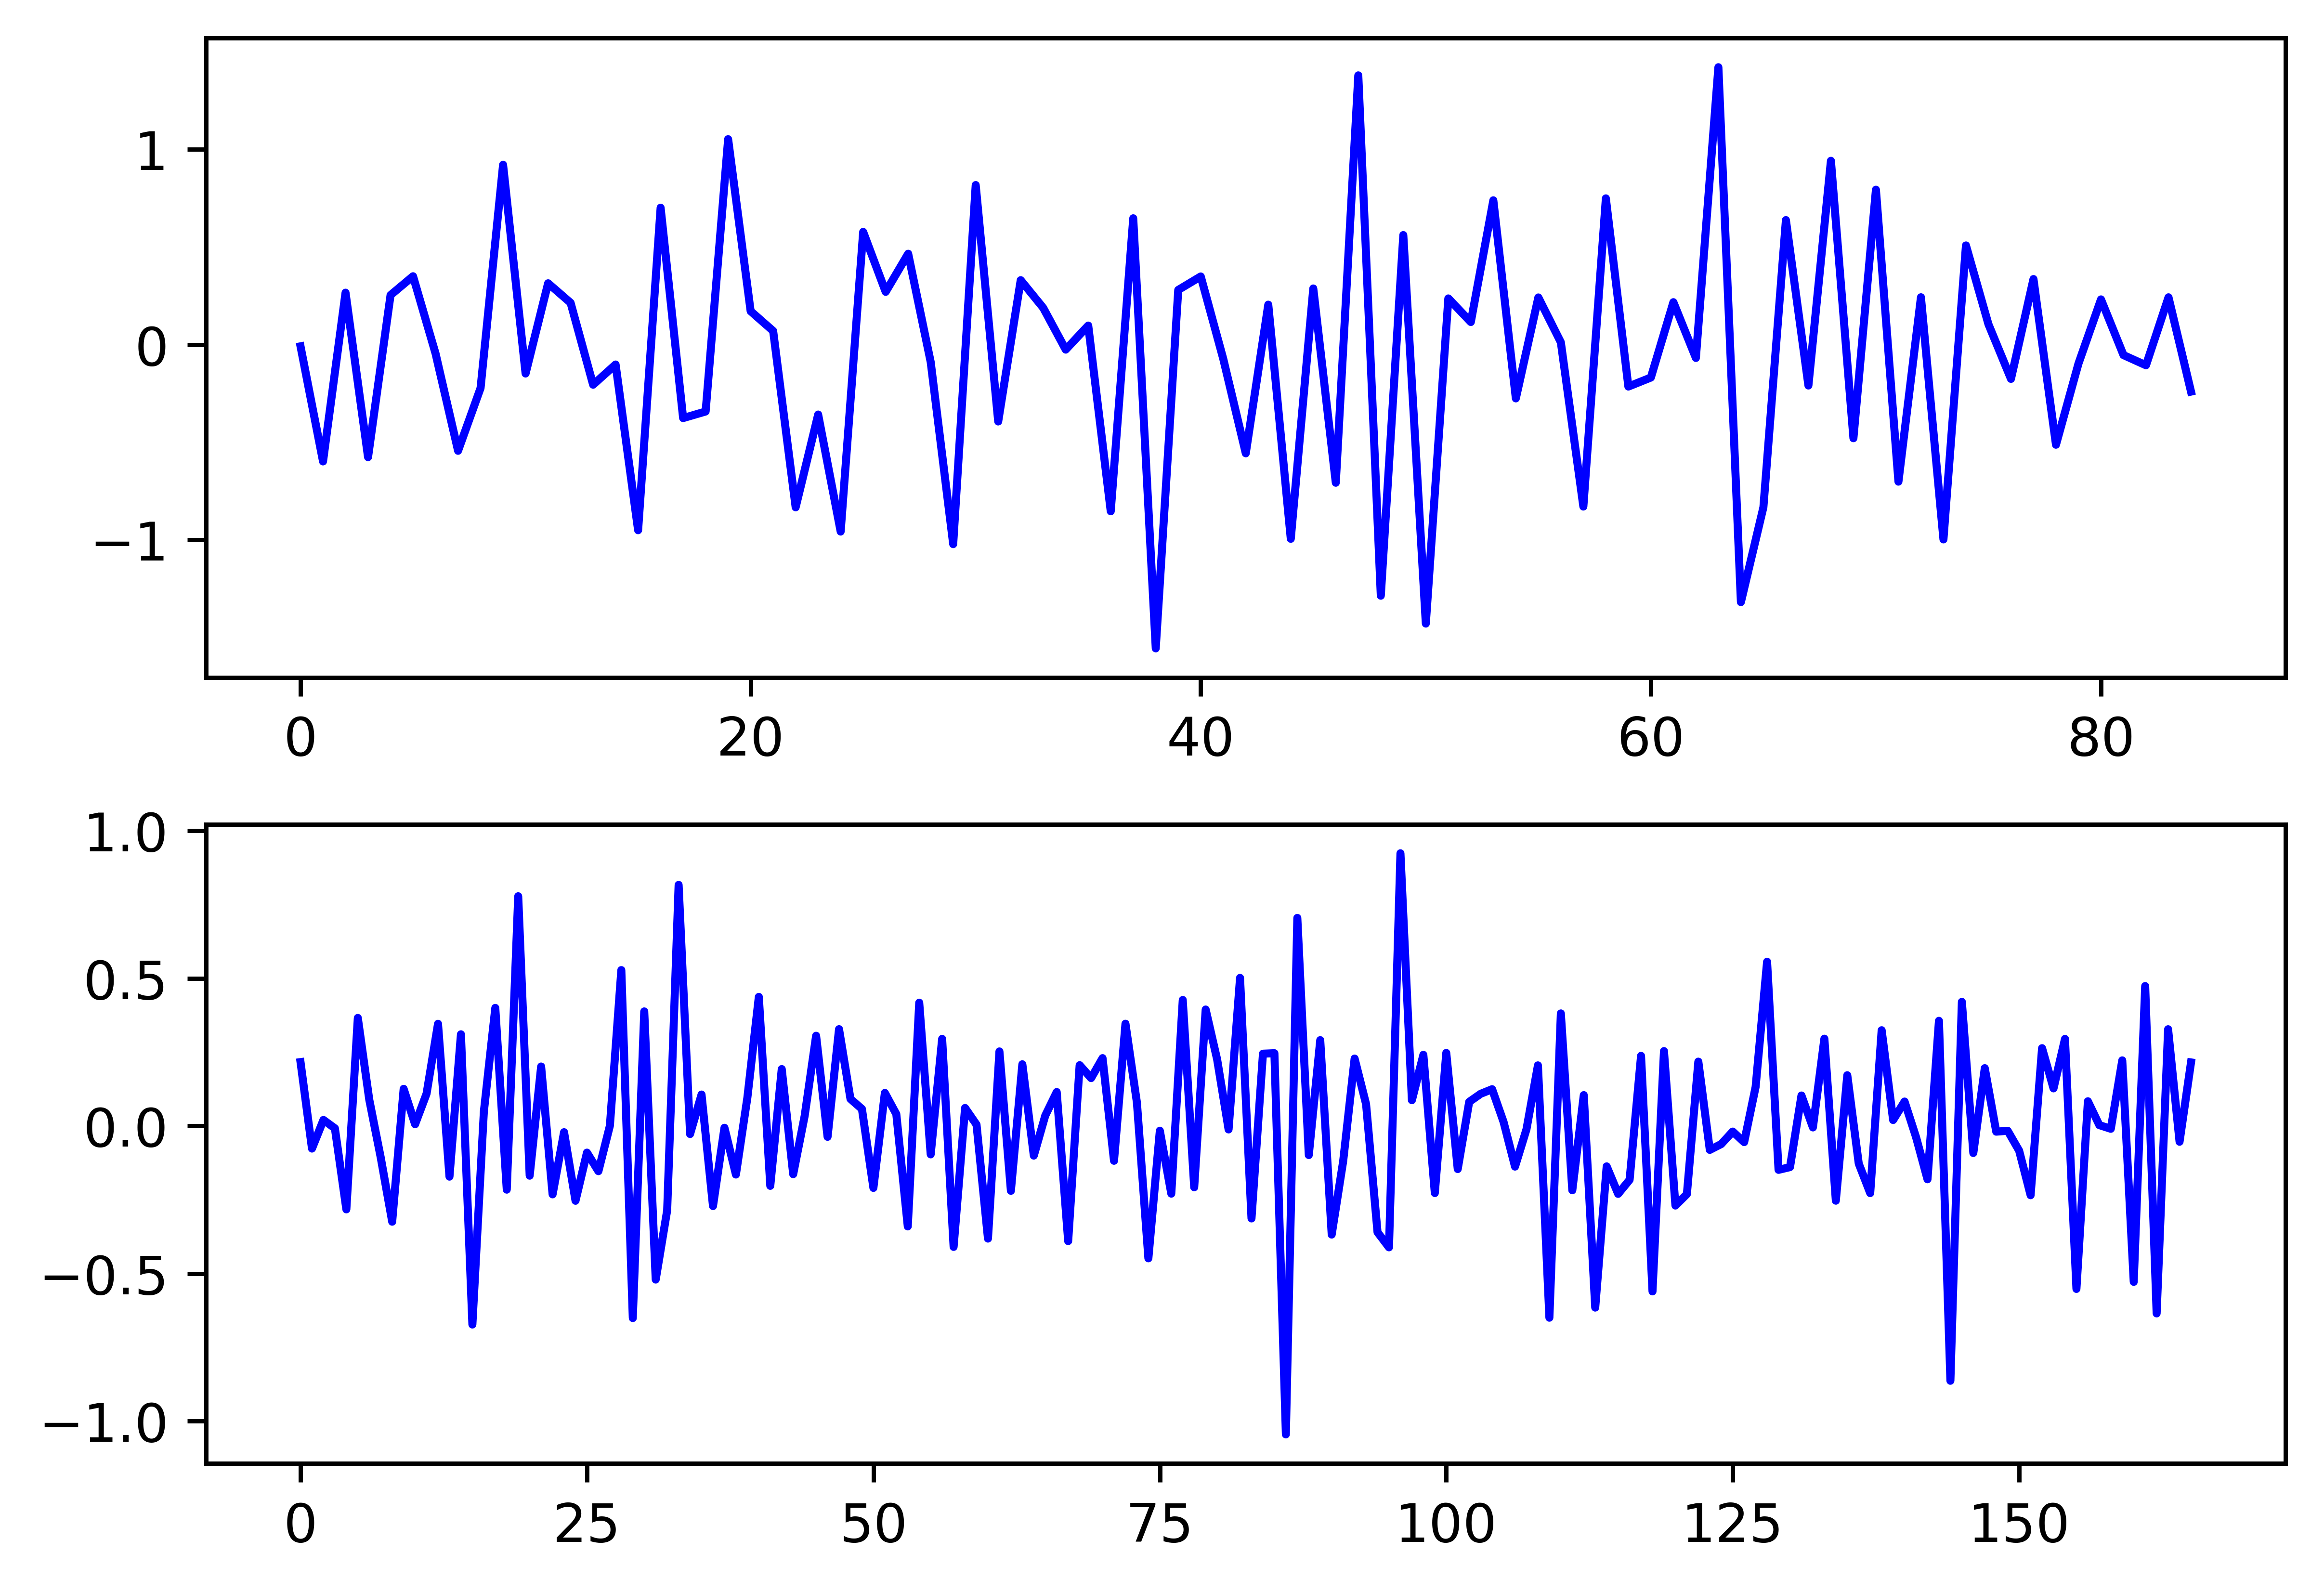

In [548]:
plt.figure(dpi=800)
plt.subplot(2,1,1)
plt.plot(d2,'b',label='mv_a3')
# plt.title('Long range A3')
# plt.legend()

plt.tight_layout()

plt.subplot(2,1,2)
plt.plot(d1,'b',label='mv_a2')
# plt.title('Long range A2')
# plt.legend()
plt.savefig('../picture/mvd2d1.tiff')

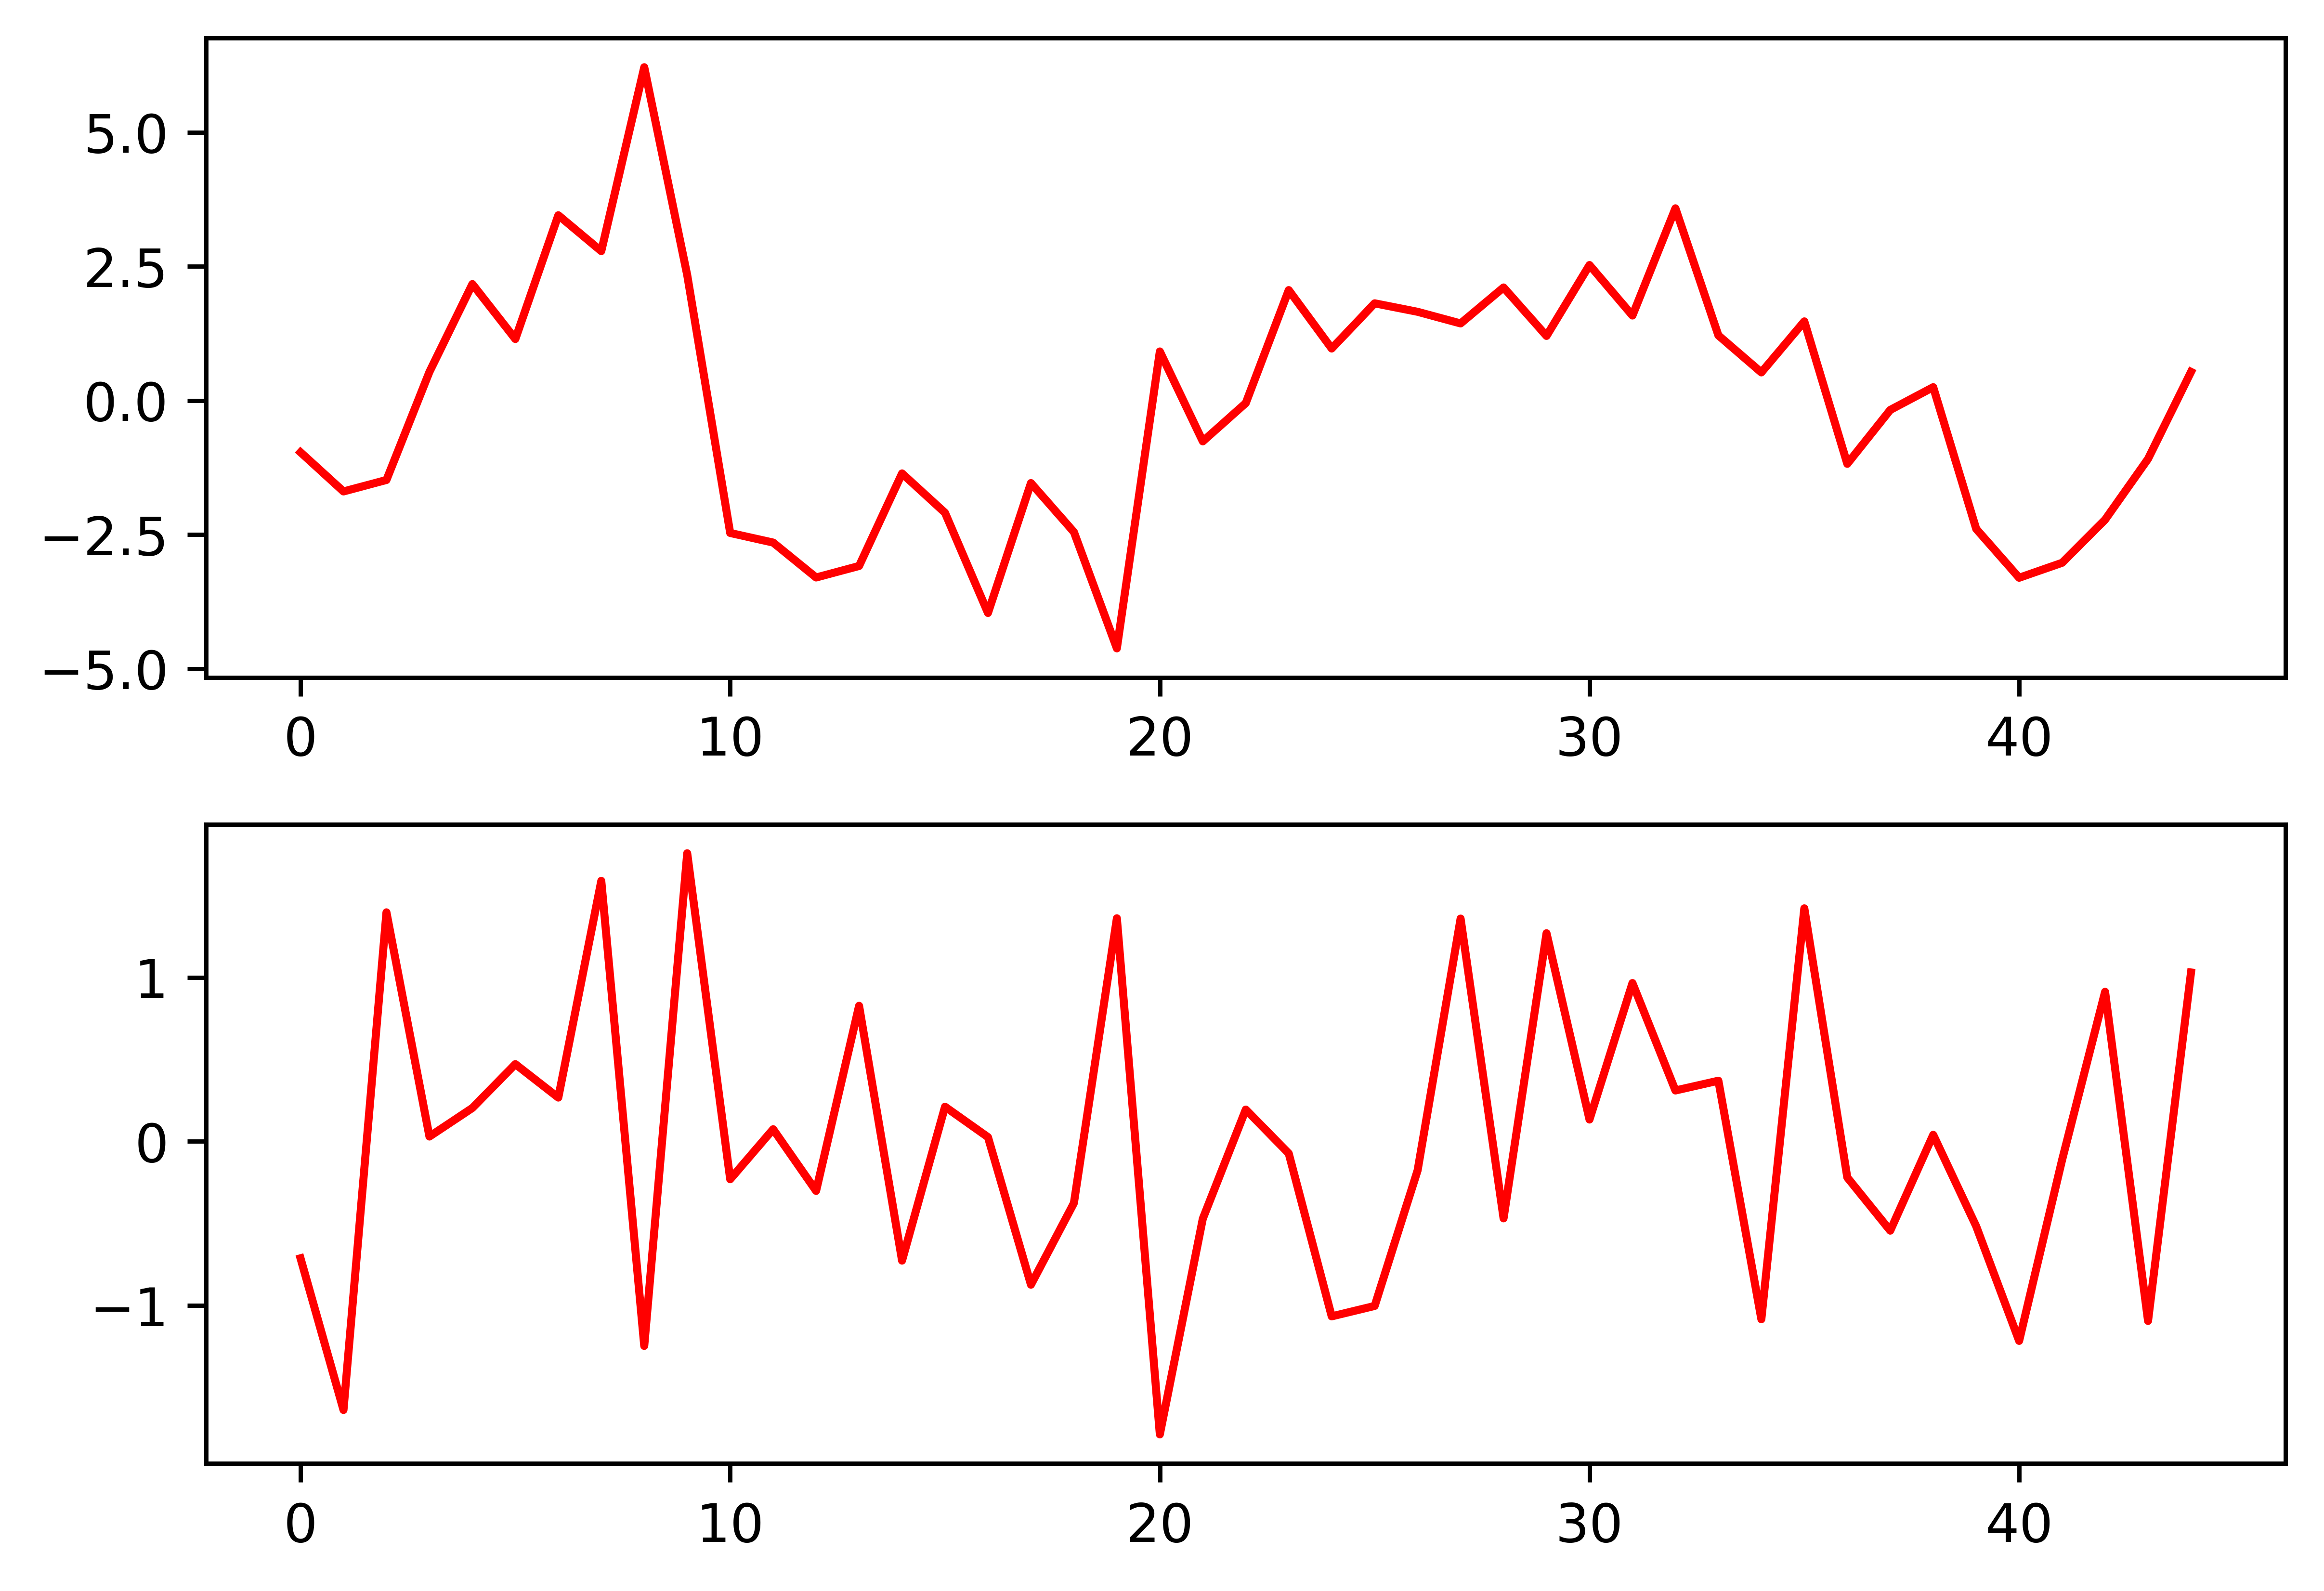

In [543]:
plt.figure(dpi=800)
plt.subplot(2,1,1)
plt.plot(t_a3,'r',label='mv_d2')
# plt.title('Short term D2')
# plt.legend()

plt.tight_layout()

plt.subplot(2,1,2)
plt.plot(t_a2,'r',label='mv_d1')
# plt.title('Short term D1')
# plt.legend()
plt.savefig('../picture/tempa3a2.tiff')

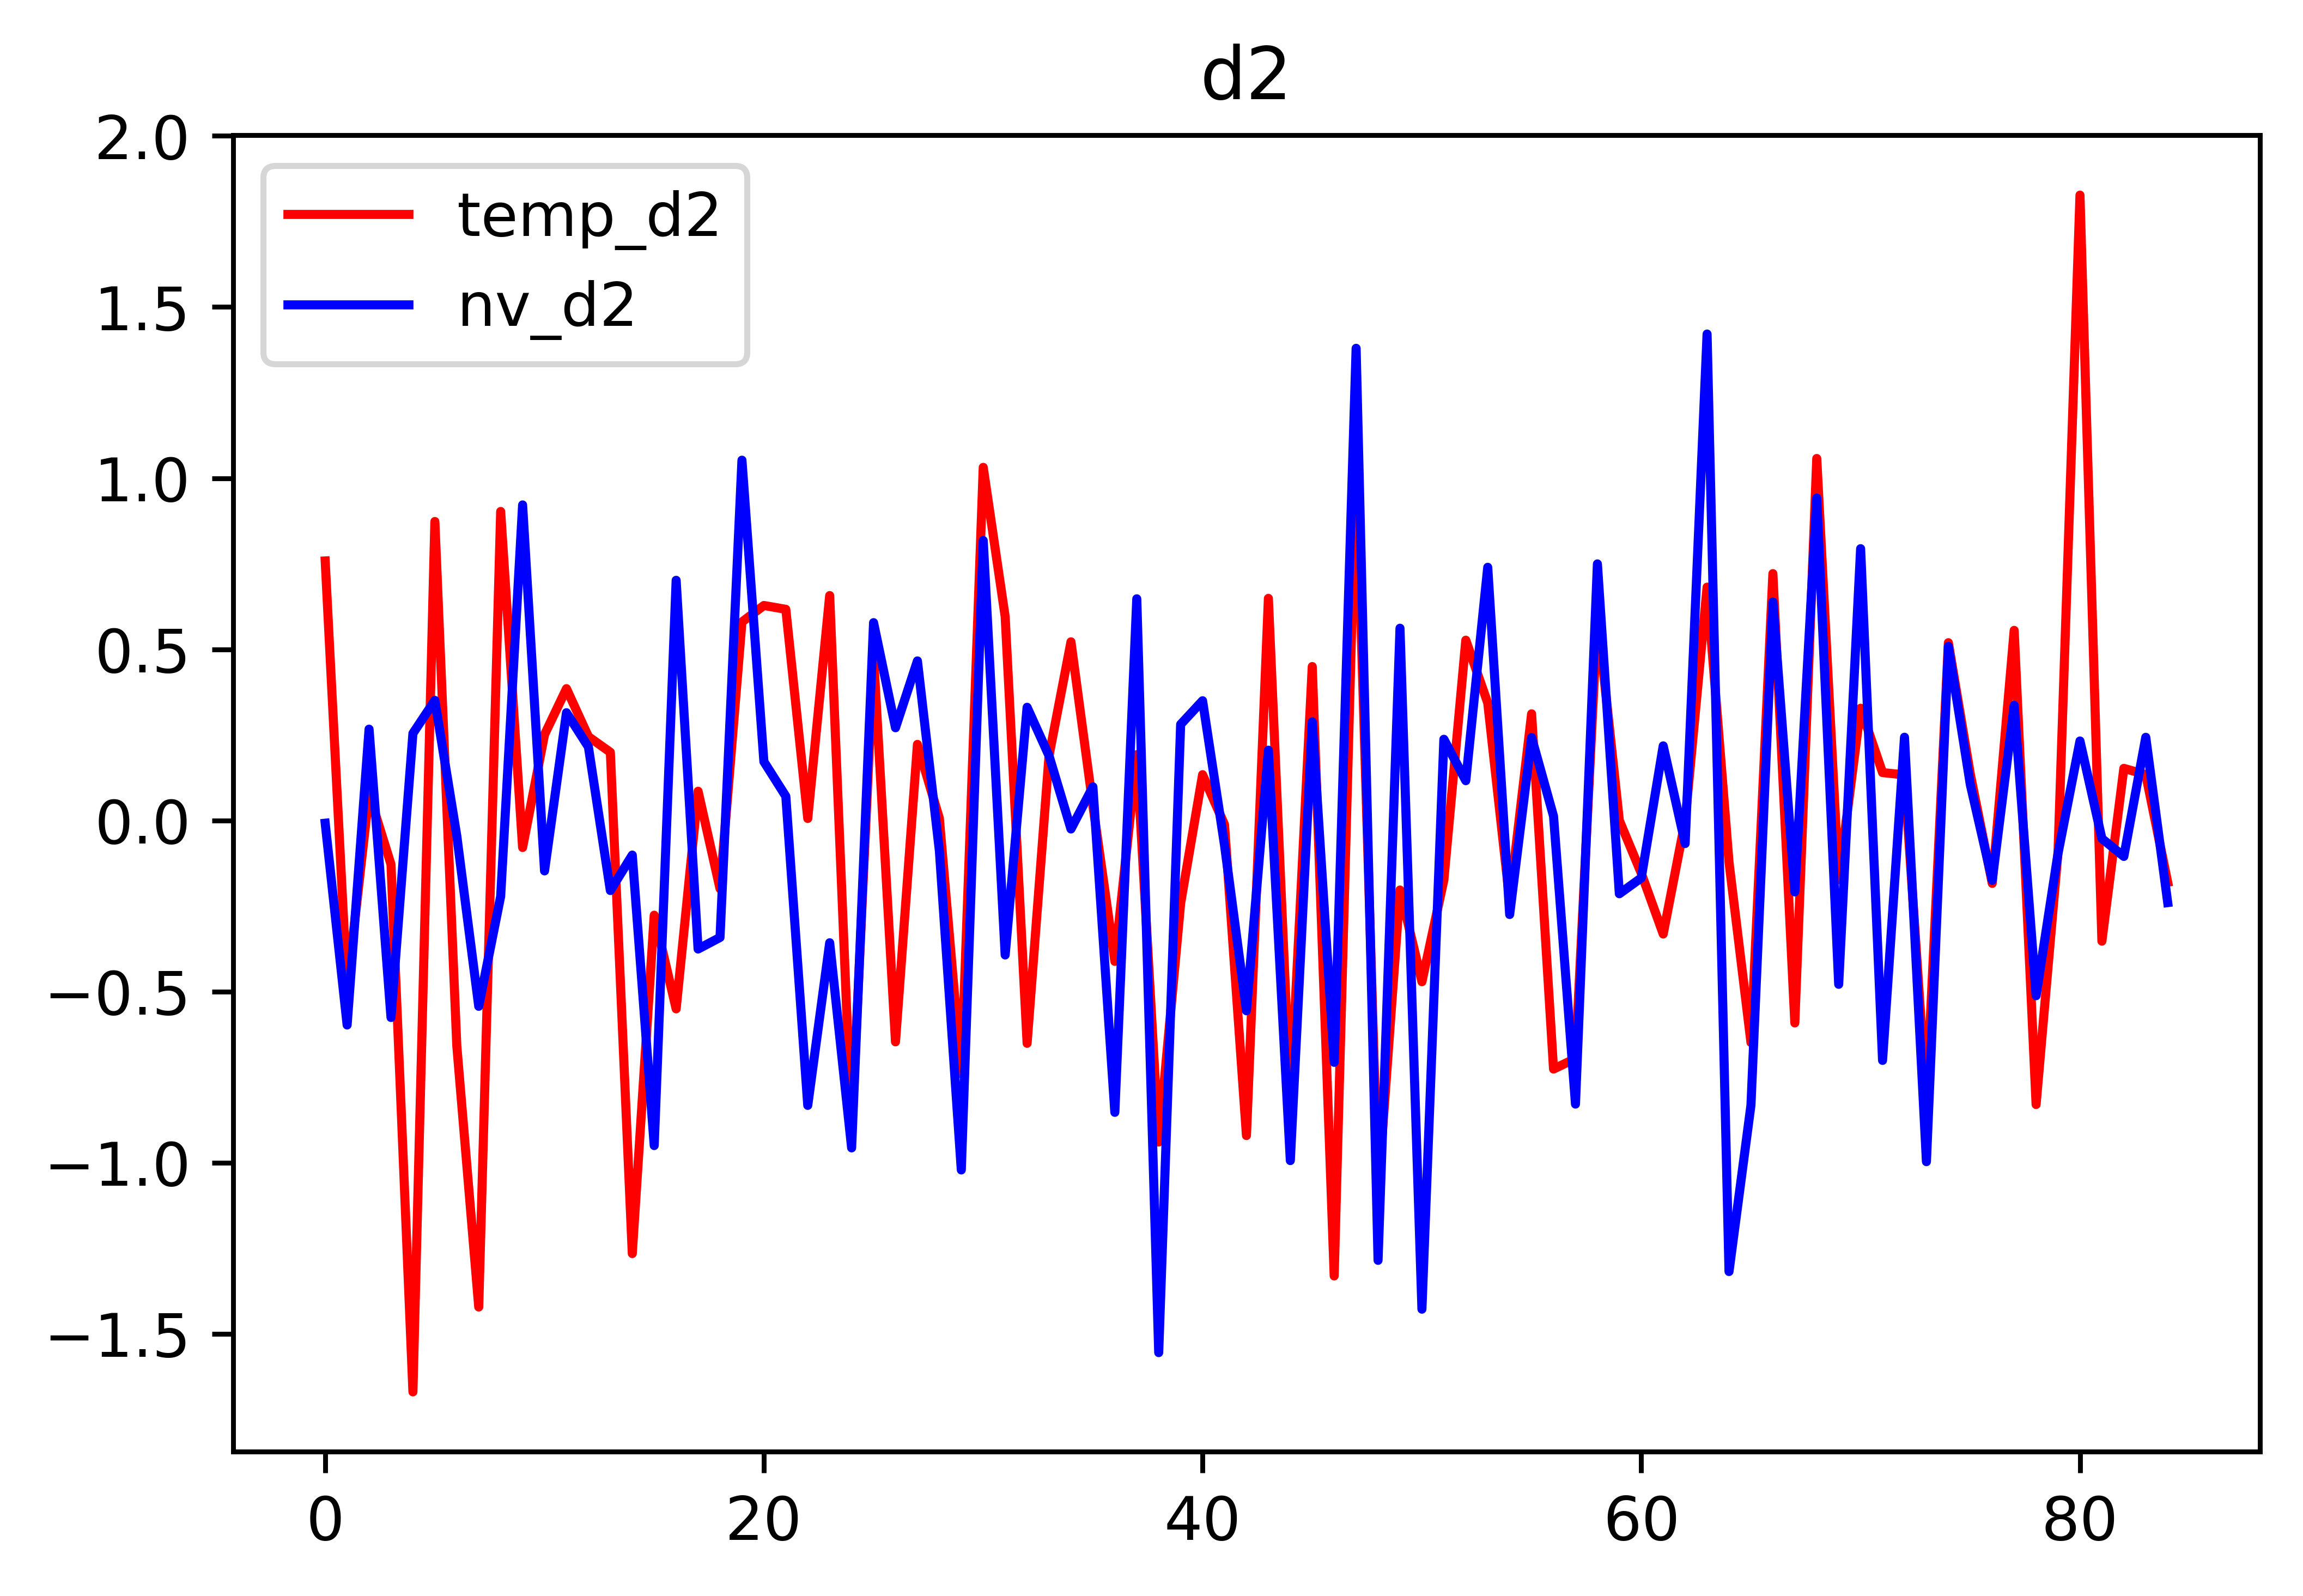

In [373]:
plt.figure(dpi=800)
plt.plot(t_d2,'r',label='temp_d2')
plt.plot(d2,'b',label='nv_d2')
plt.title('d2')
plt.legend()
# plt.savefig('../picture/d2.tiff')

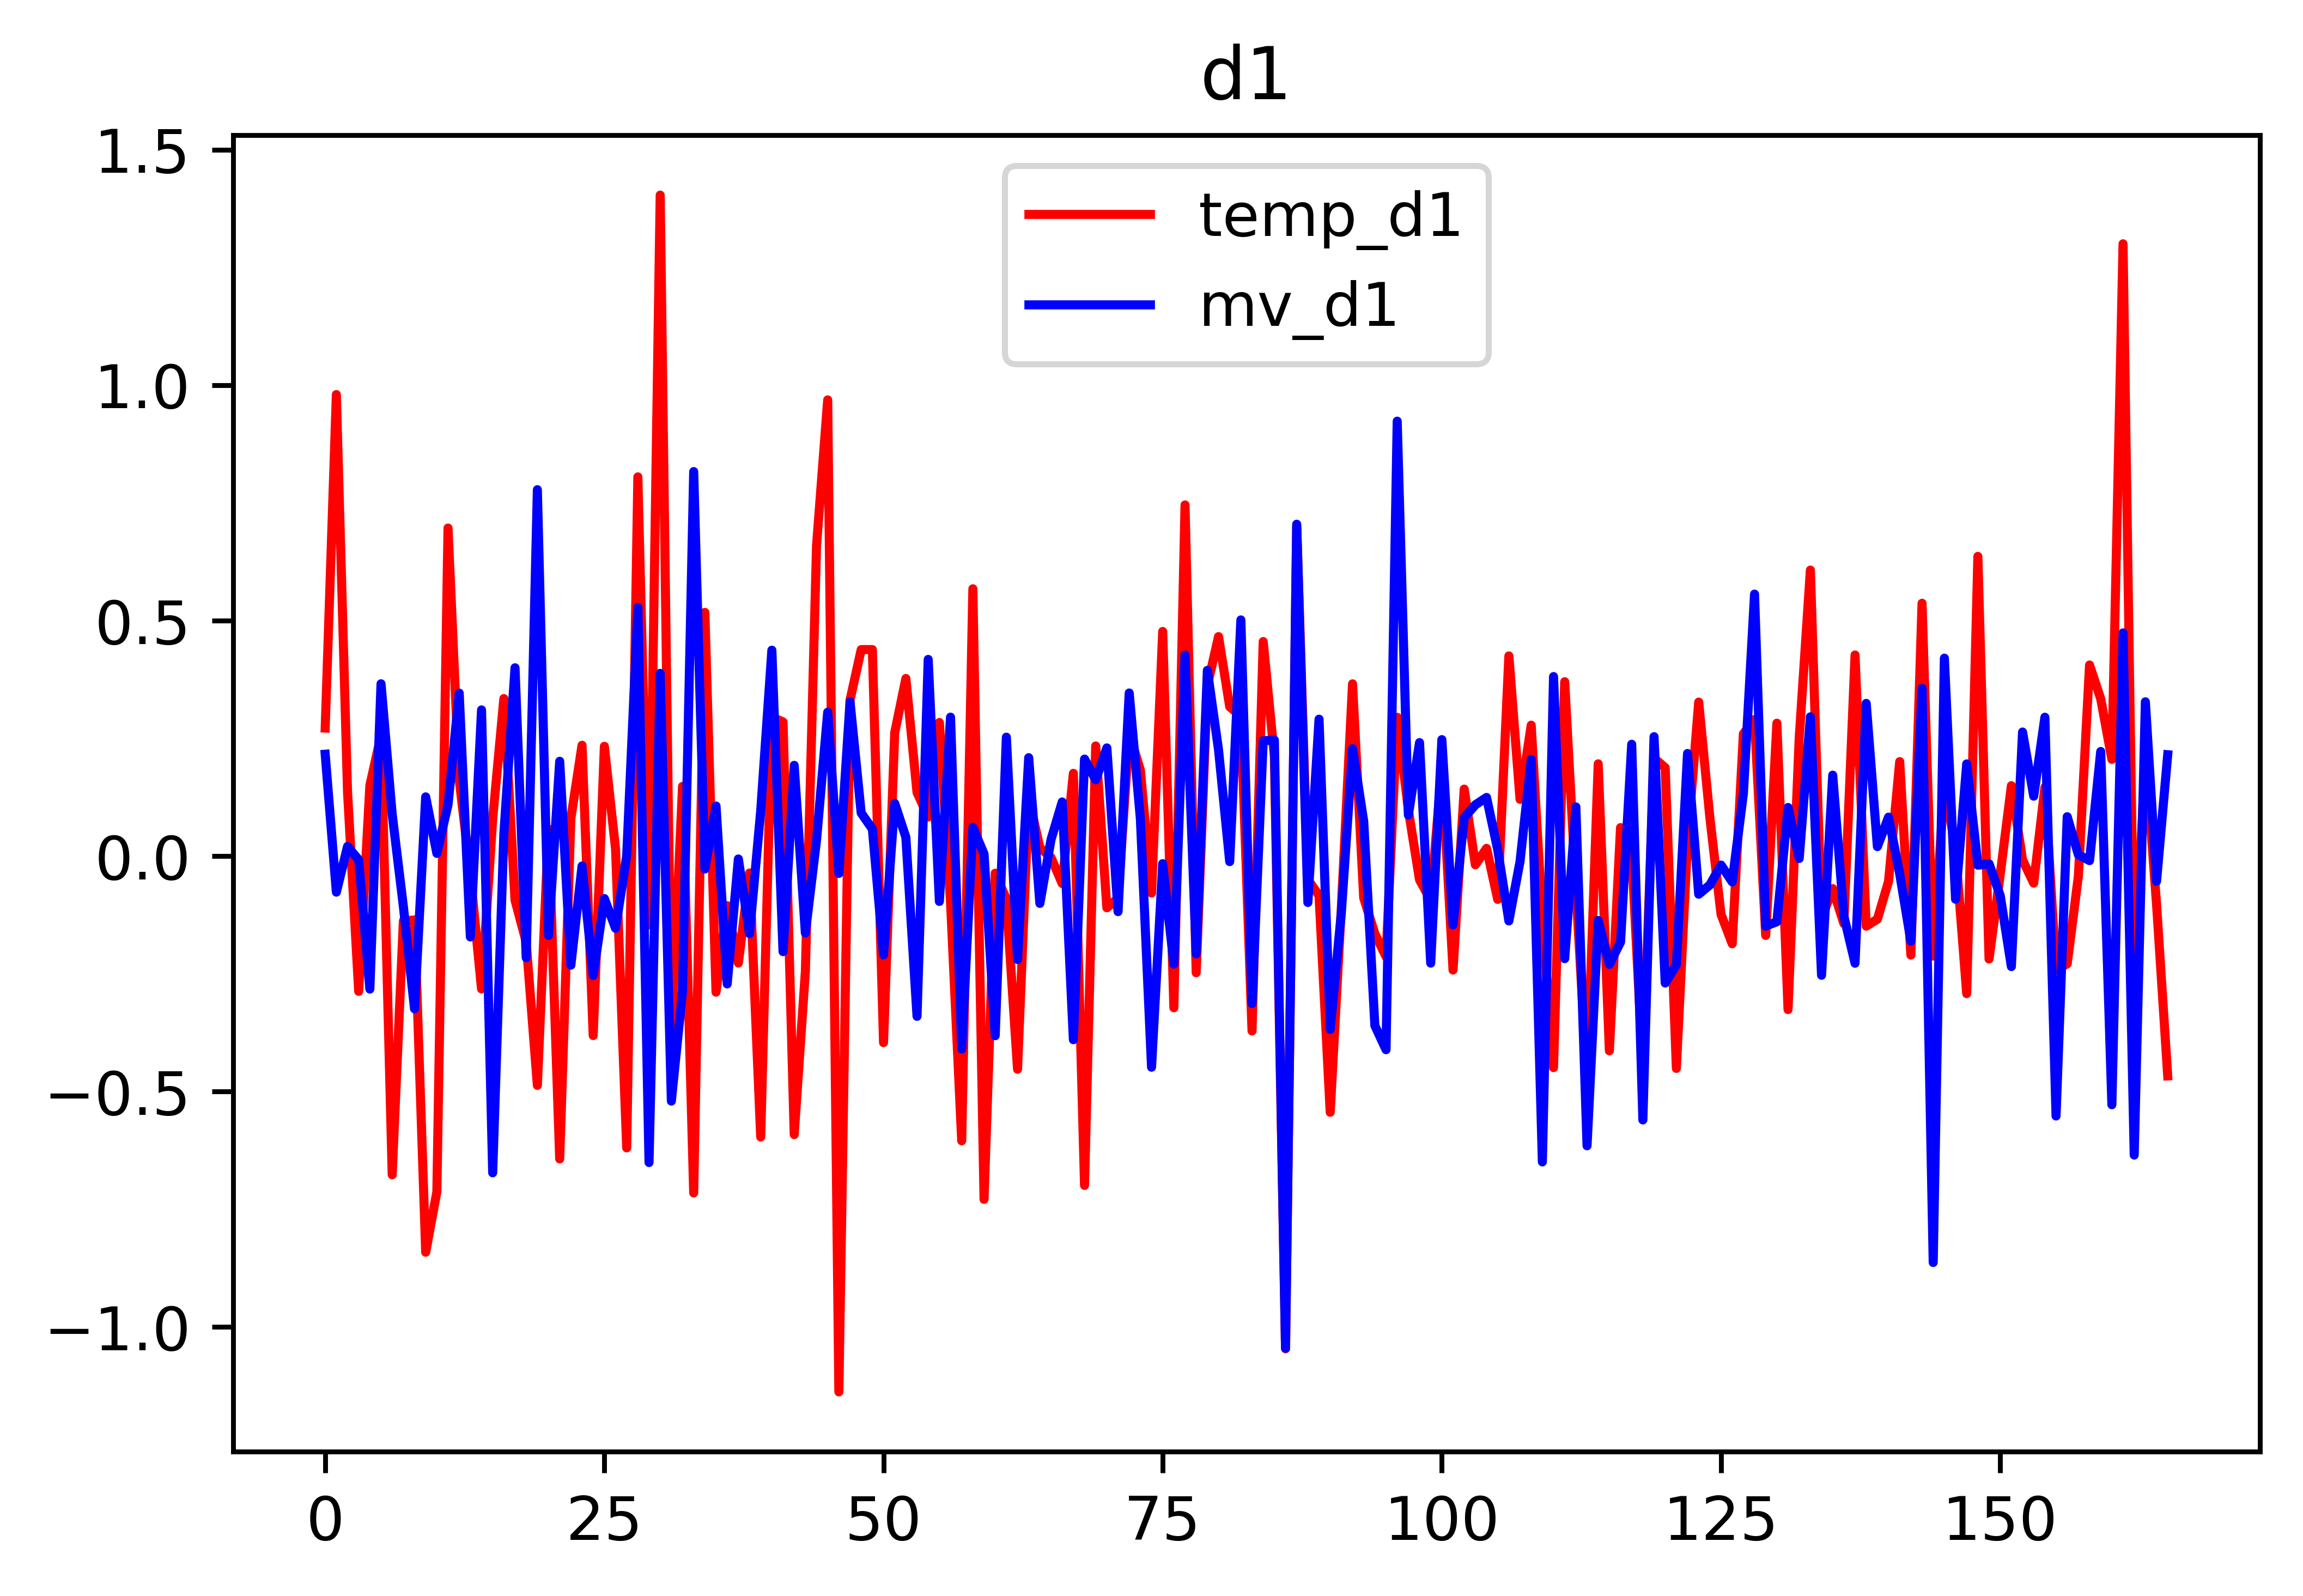

In [374]:
plt.figure(dpi=800)
plt.plot(t_d1,'r',label='temp_d1')
plt.plot(d1,'b',label='mv_d1')
plt.title('d1')
plt.legend()
# plt.savefig('../picture/d1.tiff')

In [375]:
coeff=[a3,a2,d2,d1]
print(len(a3),len(a2),len(d2),len(d1))

45 45 85 166


In [376]:
DOM2021=Data[:-7]['MV'].values
dom=normalization(DOM2021,DOM2021.mean(),DOM2021.std())
# plt.plot(dom)

In [377]:
a3_1,a2_1,d2_1,d1_1=pywt.wavedec(dom,'db3',mode='sym',level=3)
print(len(a3_1),len(a2_1),len(d2_1),len(d1_1))
# plt.plot(a3_1)

44 44 83 162


In [378]:
def func(x,a,b,c,a1,b1,a2,b2):
    yvals=a*np.sin(x*np.pi/30.0+b)+a1*np.sin(x*np.pi/21.0+b1)+a2*np.sin(x*np.pi/14.0+b2)+c
    return yvals

In [379]:
x=[]
for i in range(len(t_a3)):
    x.append(float(i))
x=np.array(x)
print(x)
y=a3
fita1,fitb1=curve_fit(func,x,y,[1,1,1,1,1,1,1])
fita1

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44.]


array([-16.11570513,  -0.08475766,   3.83650977, -17.51739618,
         2.19968051,   8.42119615,   0.84838183])

In [380]:
a=fita1[0]
b=fita1[1]
c=fita1[2]
a1=fita1[3]
b1=fita1[4]
a_2=fita1[5]
b2=fita1[6]
def sin(a,b):
    y=a*np.sin(x*np.pi/30.0+b)
    return y

In [382]:
a=fita1[0]
b=fita1[1]
c=fita1[2]
a1=fita1[3]
b1=fita1[4]
a_2=fita1[5]
b2=fita1[6]
print("a=",a,"  a1=",a1,"   a2=",a_2,"    b=",b,"   b1=",b1,"    b2=",b2,)

y_p=func(x,a,b,c,a1,b1,a_2,b2)
# plt.figure(figsize=(15,10))
# plt.figure(dpi=800)
# plt.plot(x,y_p,'r',label='a3_predict')
# plt.plot(y,'b',label='a3_true')
# plt.legend(loc="upper left")
# plt.title('curve_fit')
# plt.savefig('../picture/AEPcurve_fit.tiff')

a= -16.1157051344037   a1= -17.517396176632605    a2= 8.421196145096815     b= -0.08475766390573145    b1= 2.1996805122361303     b2= 0.8483818313264049


In [384]:
DOM2021=Data[:-7]['MV'].values
dom=normalization(DOM2021,DOM2021.mean(),DOM2021.std())
# plt.plot(dom)

In [385]:
a3_1,a2_1,d2_1,d1_1=pywt.wavedec(dom,'db3',mode='sym',level=3)
print(len(a3_1),len(a2_1),len(d2_1),len(d1_1))
# plt.plot(a3_1)

44 44 83 162


In [386]:
x_1=[]
for i in range(len(a3_1)):
    x_1.append(float(i))
x_1=np.array(x_1)
print(x)
y_1=a3_1
fita,fitb=curve_fit(func,x_1,y_1,[1,1,1,1,1,1,1])
fita

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44.]


array([-15.818378  ,  -0.08097588,   3.73522829, -17.23172835,
         2.20257559,   8.32022478,   0.84982903])

In [387]:
a=fita[0]
b=fita[1]
c=fita[2]
a1=fita[3]
b1=fita[4]
a_2=fita[5]
b2=fita[6]
print("a=",a,"  a1=",a1,"   a2=",a_2,"    b=",b,"   b1=",b1,"    b2=",b2,"    c=",c)

a= -15.818377996772094   a1= -17.23172834685288    a2= 8.320224783687031     b= -0.08097588211916171    b1= 2.202575589515597     b2= 0.8498290253264053     c= 3.7352282937171744


In [388]:
a3_p=func(len(a3_1),a,b,c,a1,b1,a_2,b2)
print(a3[-1],a3[-2])
a3_p


0.8925742041125835 -0.46122072668376046


0.9795073998068577

In [438]:
def MAPE(predict,real):
    mape =sum(abs((predict-real)/predict))/len(predict)*100
    return mape
def ERROR(predict,real):
    E=(predict-real)/predict
    return E
def MSE(predict,real):
    mse=float((predict-real)**2/len(predict))
    return mse

In [439]:
print(a2[:-1]/a2_1)
q=t_a2[-6:]
print(q)
theta1=[]  # 存放k1,k2,k3,k4,k5
for i in range(1,len(q)):
    q2=q[i]-q[i-1]
    theta1.append(q2)
q3=a2_1[-5]
q4=[]
for i in range(5):
    q3+=(theta1[i])
    q4.append(q3)
lA2_new=a2_1[:-4].tolist()
for i in range(len(q4)):
    lA2_new.append(q4[i])
A2_new=np.array(lA2_new)
print(A2_new/a2)
print(a2[-5:])
A2_new[-5:]
# plt.figure(dpi=800)
# plt.plot(A2_new,'r',label='NEW')
# plt.plot(a2,'b',label='Origin')
# plt.legend()
# plt.savefig('../picture/week since form')

[ 1.00827445  1.00827445  1.00827445  1.00827445  1.00827445  1.00827445
  1.00827445  1.00827445  1.00827445  1.00827445  1.00827445  1.00827445
  1.00827445  1.00827445  1.00827445  1.00827445  1.00827445  1.00827445
  1.00827445  1.00827445  1.00827445  1.00827445  1.00827445  1.00827445
  1.00827445  1.00827445  1.00827445  1.00827445  1.00827445  1.00827445
  1.00827445  1.00827445  1.00827445  1.00827445  1.00827445  1.00827445
  1.00827445  1.00827445  1.00827445  1.00827445  1.64325609  0.69534609
 -0.59570082 -0.70787447]
[-0.51668093 -1.21522554 -0.1118259   0.91196136 -1.09365184  1.0297453 ]
[ 0.99179345  0.99179345  0.99179345  0.99179345  0.99179345  0.99179345
  0.99179345  0.99179345  0.99179345  0.99179345  0.99179345  0.99179345
  0.99179345  0.99179345  0.99179345  0.99179345  0.99179345  0.99179345
  0.99179345  0.99179345  0.99179345  0.99179345  0.99179345  0.99179345
  0.99179345  0.99179345  0.99179345  0.99179345  0.99179345  0.99179345
  0.99179345  0.99179345

array([-1.82342466, -0.72002502,  0.30376225, -1.70185095,  0.42154619])

In [440]:
print(a,a1,a_2,b,b1,b2,c)
a_new=a-1.5+3*np.random.rand(1000)  # +-1.5
a1_new=-1+4*np.random.rand(1000)+a1
a2_new=-1+2*np.random.rand(1000)+a_2
b_new=-0.5+np.random.rand(1000)+b   # +-0.5
b1_new=-0.5+np.random.rand(1000)+b1
b2_new=-0.5+np.random.rand(1000)+b2
c_new=-0.5+np.random.rand(1000)+c

-15.818377996772094 -17.23172834685288 8.320224783687031 -0.08097588211916171 2.202575589515597 0.8498290253264053 3.7352282937171744


In [441]:
mape=np.zeros((1000,))
excel=np.zeros((1000,))
true=mv[-7:]
print(true)
for i in range(1000):
    xi=[a_new[i],a1_new[i],a2_new[i],b_new[i],b1_new[i],b2_new[i],c_new[i]]
    y_predict_1=func(len(a3_1),a_new[i],b_new[i],c_new[i],a1_new[i],b1_new[i],a2_new[i],b2_new[i])
    y_predict_2=func(len(a3_1)-1,a_new[i],b_new[i],c_new[i],a1_new[i],b1_new[i],a2_new[i],b2_new[i])
#     print(y_predict_1,y_predict_2)
    l=a3.tolist()
    l[-1]=y_predict_2
    l.append(y_predict_1)
    l_new=np.array(l)
    
#     q=t_a2[-6:]
#     theta=[]
#     for j in range(1,len(q)):
#         q2=q[j]-q[j-1]
#         theta.append(q2)
#     q3=a2_1[-5]
#     q4=[]
#     for j in range(len(q4)):
#         lA2_new.append(q4[j])
#     A2_new=np.array(lA2_new)
    
    coeff_new=[l_new,A2_new,d2,d1]
    Denoised=pywt.waverec(coeff_new,'db3')
    mape[i]=MAPE(Denoised[-7:],true)

[-0.76786025 -0.39997911  0.16482792 -0.18122733 -0.77770201  0.0215648
  0.51104672]


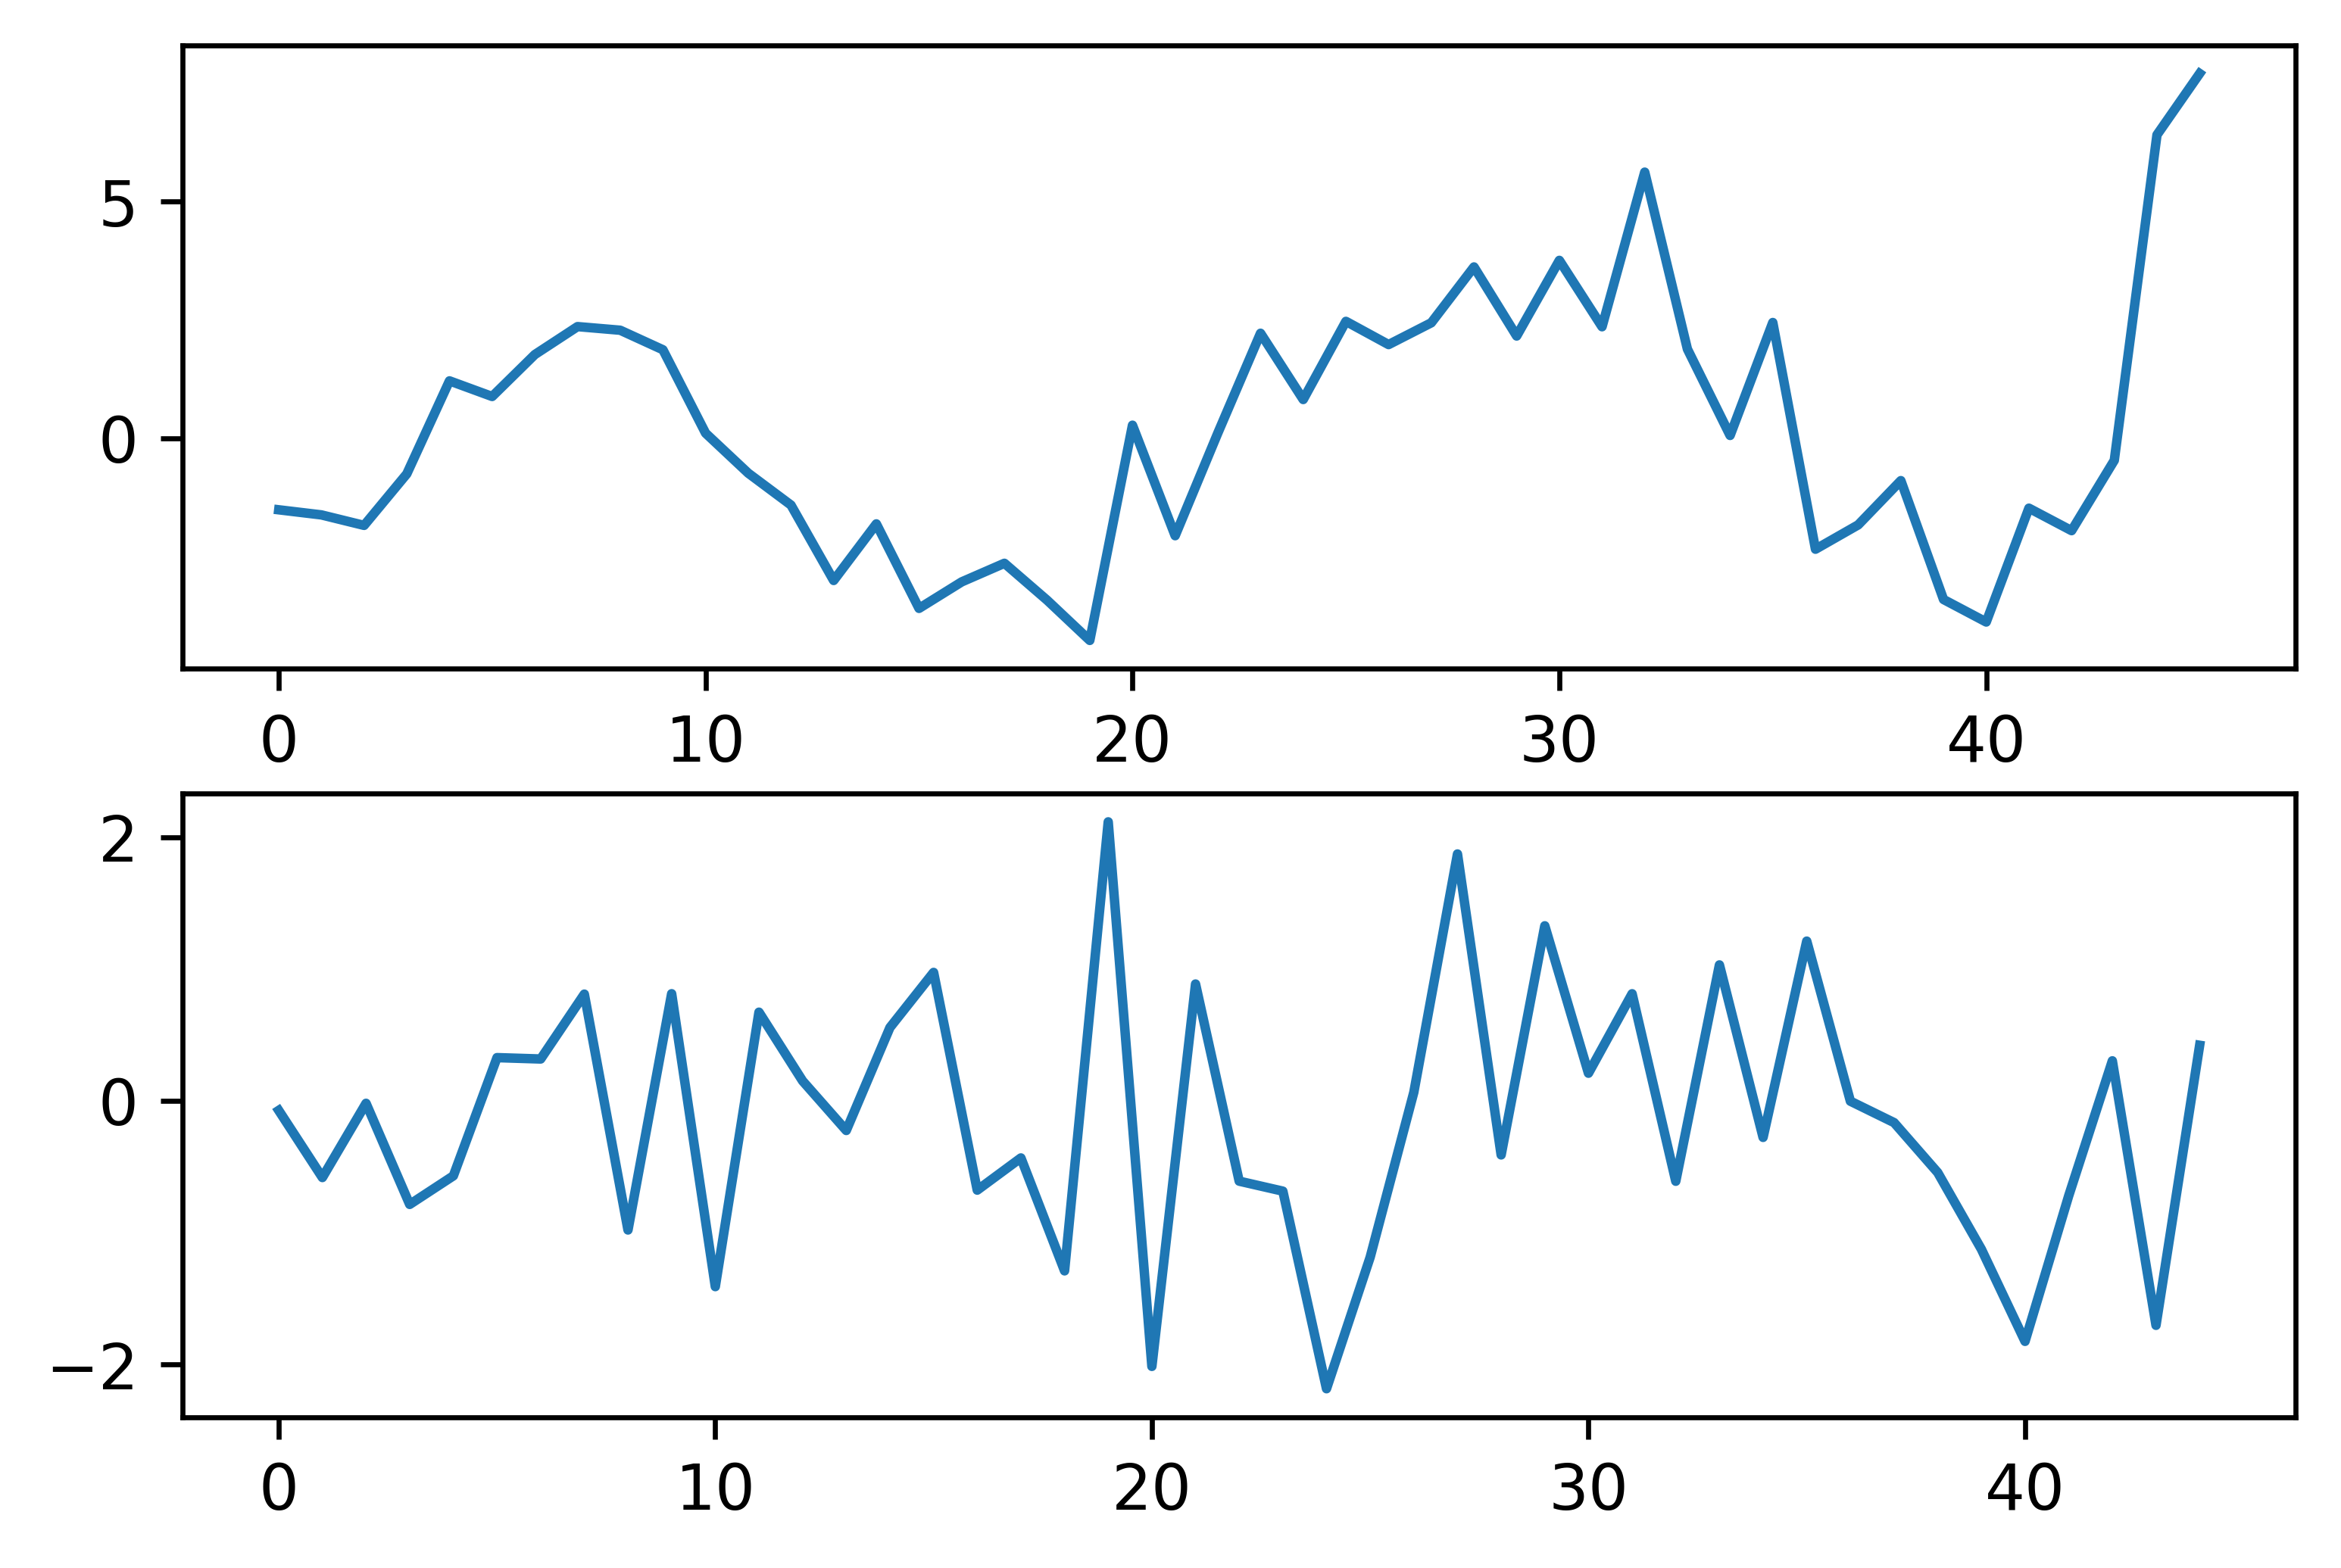

In [547]:
plt.figure(dpi=600)
plt.subplot(2,1,1)
plt.plot(l_new)
plt.subplot(2,1,2)
plt.plot(A2_new)
plt.savefig('sa.tiff')

In [442]:
ssd=MAPE(Denoised[:-1],mv)
ssd
de=Denoised[:-1]

ssd=np.zeros(((len(de),)))

for i in range(1,len(de)+1):
    ssd[i-1]=MAPE(de[:i],mv[:i])

ssd

array([ 0.43650354,  0.26669335,  0.17965809,  0.41209556,  0.43678819,
        0.40254019,  0.36115213,  0.31759924,  0.33137599,  0.82149074,
        0.76248933,  0.71631688,  0.66786153,  0.6269428 ,  0.63398687,
        1.47712469,  1.45778908,  1.37772418,  1.31648522,  1.2894663 ,
        1.25223178,  1.19854509,  1.15930818,  1.27291891,  1.24224552,
        1.23409561,  1.19086961,  1.15195837,  1.11521325,  1.08167273,
        1.11125979,  1.08019807,  1.04962645,  1.01913714,  0.99087169,
        0.97070423,  0.95425411,  0.93056102,  0.90706478,  0.88731697,
        0.8663233 ,  0.84844051,  0.83404437,  0.84267953,  0.83603716,
        0.81889713,  0.80583334,  0.79616262,  0.78898521,  0.77853786,
        0.76762443,  0.75318327,  0.74275656,  0.73684227,  0.77215463,
        0.81050723,  0.83694634,  0.82806463,  0.81598959,  0.81752292,
        0.8071636 ,  0.7988776 ,  0.83822264,  0.83705893,  0.84991398,
        0.85226203,  0.84432046,  0.85482338,  0.84370743,  0.83

In [404]:
# coeff_new=[a3,a2,d2,d1]
coeff_new=[l_new,A2_new,d2,d1]
Denoised=pywt.waverec(coeff_new,'db3')
tamf=Denoised[-8:-1]*AEP.std()+AEP.mean()
print(mv_r)
tamf

[14813.161 15656.632 16951.611 16158.182 14790.596 16623.14  17745.415]


array([13440.26165662, 15300.02086772, 17208.05123731, 17293.9850503 ,
       15496.06717673, 16423.10640237, 16968.8184381 ])

In [405]:
def MAPE(predict,real):
    mape =sum(abs((predict-real)/real))/len(predict)*100
    return mape
mape1=MAPE(tamf,mv_r)
mape1

4.348178967886089

In [285]:
# #error
# plt.figure(dpi=800)
# plt.plot(Denoised[-7:],'r-')
# plt.plot(true,'b-')
# plt.title('a week of error')
# plt.savefig('../picture/a_week_of_error')

In [286]:
df=pd.DataFrame({'a':a_new,'b':b_new,'c':c_new,'a1':a1_new,'b1':b1_new,'a2':a2_new,'b2':b2_new,'mape':mape})
# df.to_csv('../picture/a-mape.csv')
df.describe()

a            b            c           a1           b1  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean    -15.791351    -0.089300     3.729426   -16.223615     2.200837   
std       0.884807     0.284011     0.291249     1.158484     0.290085   
min     -17.318359    -0.580129     3.236645   -18.228316     1.703033   
25%     -16.595496    -0.327729     3.466902   -17.257052     1.951870   
50%     -15.774374    -0.104623     3.738488   -16.207480     2.200834   
75%     -14.997384     0.160909     3.974457   -15.253858     2.446687   
max     -14.319941     0.418549     4.232809   -14.238200     2.702009   

                a2           b2         mape  
count  1000.000000  1000.000000  1000.000000  
mean      8.328070     0.853724     4.479047  
std       0.579637     0.287362     2.604351  
min       7.322384     0.352140     1.038652  
25%       7.812602     0.611289     2.339740  
50%       8.338616     0.852872     3.835019  
75%       8.806971     1.091199     6.064667  
max       9.319707     1.349365    12.956571

In [287]:
# df1=df[(df['mape'].values<1)]
# df1

In [288]:
A=np.zeros((1000,))
B=np.zeros((1000,))
C=np.zeros((1000,))
for i in range(len(a_new)):
    A[i]=(a_new[i]+a1_new[i]+a2_new[i])/max(a_new[i],a1_new[i],a2_new[i])
    B[i]=(b_new[i]+b1_new[i]+b2_new[i])/max(b_new[i],b1_new[i],b2_new[i])
    C[i]=c_new[i]

def MIN_MAX(x,x_max,x_min):
    norm=(x-x_min)/(x_max-x_min)
    return norm

A_norm=MIN_MAX(A,A.max(),A.min())
B_norm=MIN_MAX(B,B.max(),B.min())
C_norm=MIN_MAX(C,C.max(),C.min())
# mape=normalization(mape,mape.mean(),mape.std())
# mape
df2=pd.DataFrame({'a':A_norm,'b':B_norm,'c':C_norm,'mape':mape})
# df2

2.7921026881372994 -0.6400215981177491 -0.6949811570309923


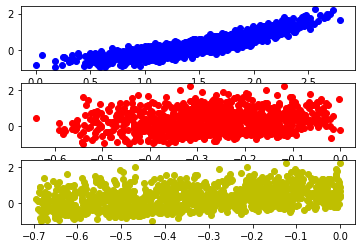

In [289]:
alpha = 0.001

epoch = 1

theta0 = 0.1
theta1 = 0.1
theta2 = 0.1

diff_all = 0
diff_a = 0
diff_b = 0
diff_c = 0

error_pre = 0
error_post = 0

Threshold = 0.001
while epoch < 10000:

    for i in range(len(mape)):
        diff_all += theta0*A_norm[i]**2 + theta1*B_norm[i] + theta2*C_norm[i] - mape[i]
        diff_a += (theta0*A_norm[i]**2 + theta1*B_norm[i] + theta2*C_norm[i] - mape[i])*A_norm[i]
        diff_b += (theta0*A_norm[i]**2 + theta1*B_norm[i] + theta2*C_norm[i] - mape[i])*B_norm[i]
        diff_c += (theta0*A_norm[i]**2 + theta1*B_norm[i] + theta2*C_norm[i] - mape[i])*C_norm[i] 

    #更新参数theta0, theta1, theta2

    theta0 = theta0 - alpha/len(mape)*diff_a
    theta1 = theta1 - alpha/len(mape)*diff_b
    theta2 = theta2 - alpha/len(mape)*diff_c

    #判断后向误差是否满足要求

    for j in range(len(mape)):
        error_post += (theta0*A_norm[j]**2 + theta1*B_norm[j] + theta2*C_norm[j] - mape[j])**2/(2*len(mape))

    if abs(error_post-error_pre)<Threshold:
        epoch = 10000
    else: 
        error_pre = error_post
        epoch += 1

Pre = theta0*A_norm**2+ theta1*B_norm + theta2*C_norm

plt.subplot(3,1,1)
plt.plot(theta0*A_norm,Pre,'bo')
plt.subplot(3,1,2)
plt.plot(theta1*B_norm,Pre,'ro')
plt.subplot(3,1,3)
plt.plot(theta2*C_norm,Pre,'yo')

print(theta0, theta1, theta2)
# df=pd.DataFrame({'a':theta0*Param_a,'b':theta1*Param_b,'c':theta2*Param_c,'error':MAPE-Pre,'Pre':Pre,'MAPE':MAPE})
# df.to_csv('1.csv')
plt.show()

In [290]:
def Return(x,x_max,x_min):
    origin = x*(x_max-x_min)+x_min
    return origin

In [291]:
A_origin=Return(theta0*A_norm,A.max(),A.min())
B_origin=Return(theta1*B_norm,B.max(),B.min())
C_origin=Return(theta2*C_norm,C.max(),C.min())
v=np.sort(A_origin)
v1=np.split(v,10)
v1[0].mean()

-2.7991330798991174

In [295]:
df3=pd.DataFrame({'a':A_origin,'b':B_origin,'c':C_origin,'mape':mape})
# df4=df3[(df3['mape'].values<1)]
# df4
df3
# df4.to_csv('../picture/a_mape.csv')

a         b         c      mape
0   -1.440978  0.796257  2.850844  1.058706
1   -3.803244  0.468660  2.868303  6.432872
2   -1.503120  0.648336  2.565418  2.340508
3   -0.381988  0.670728  3.232998  7.085968
4   -1.837130  0.618537  3.190140  3.063666
..        ...       ...       ...       ...
995 -1.841760  0.362643  3.105221  5.290561
996 -2.167240  0.653608  2.770407  2.975730
997 -0.862142  0.518761  2.931032  2.674209
998 -1.099491  0.817364  3.152597  3.433162
999 -0.911503  0.850428  2.913422  2.303532

[1000 rows x 4 columns]

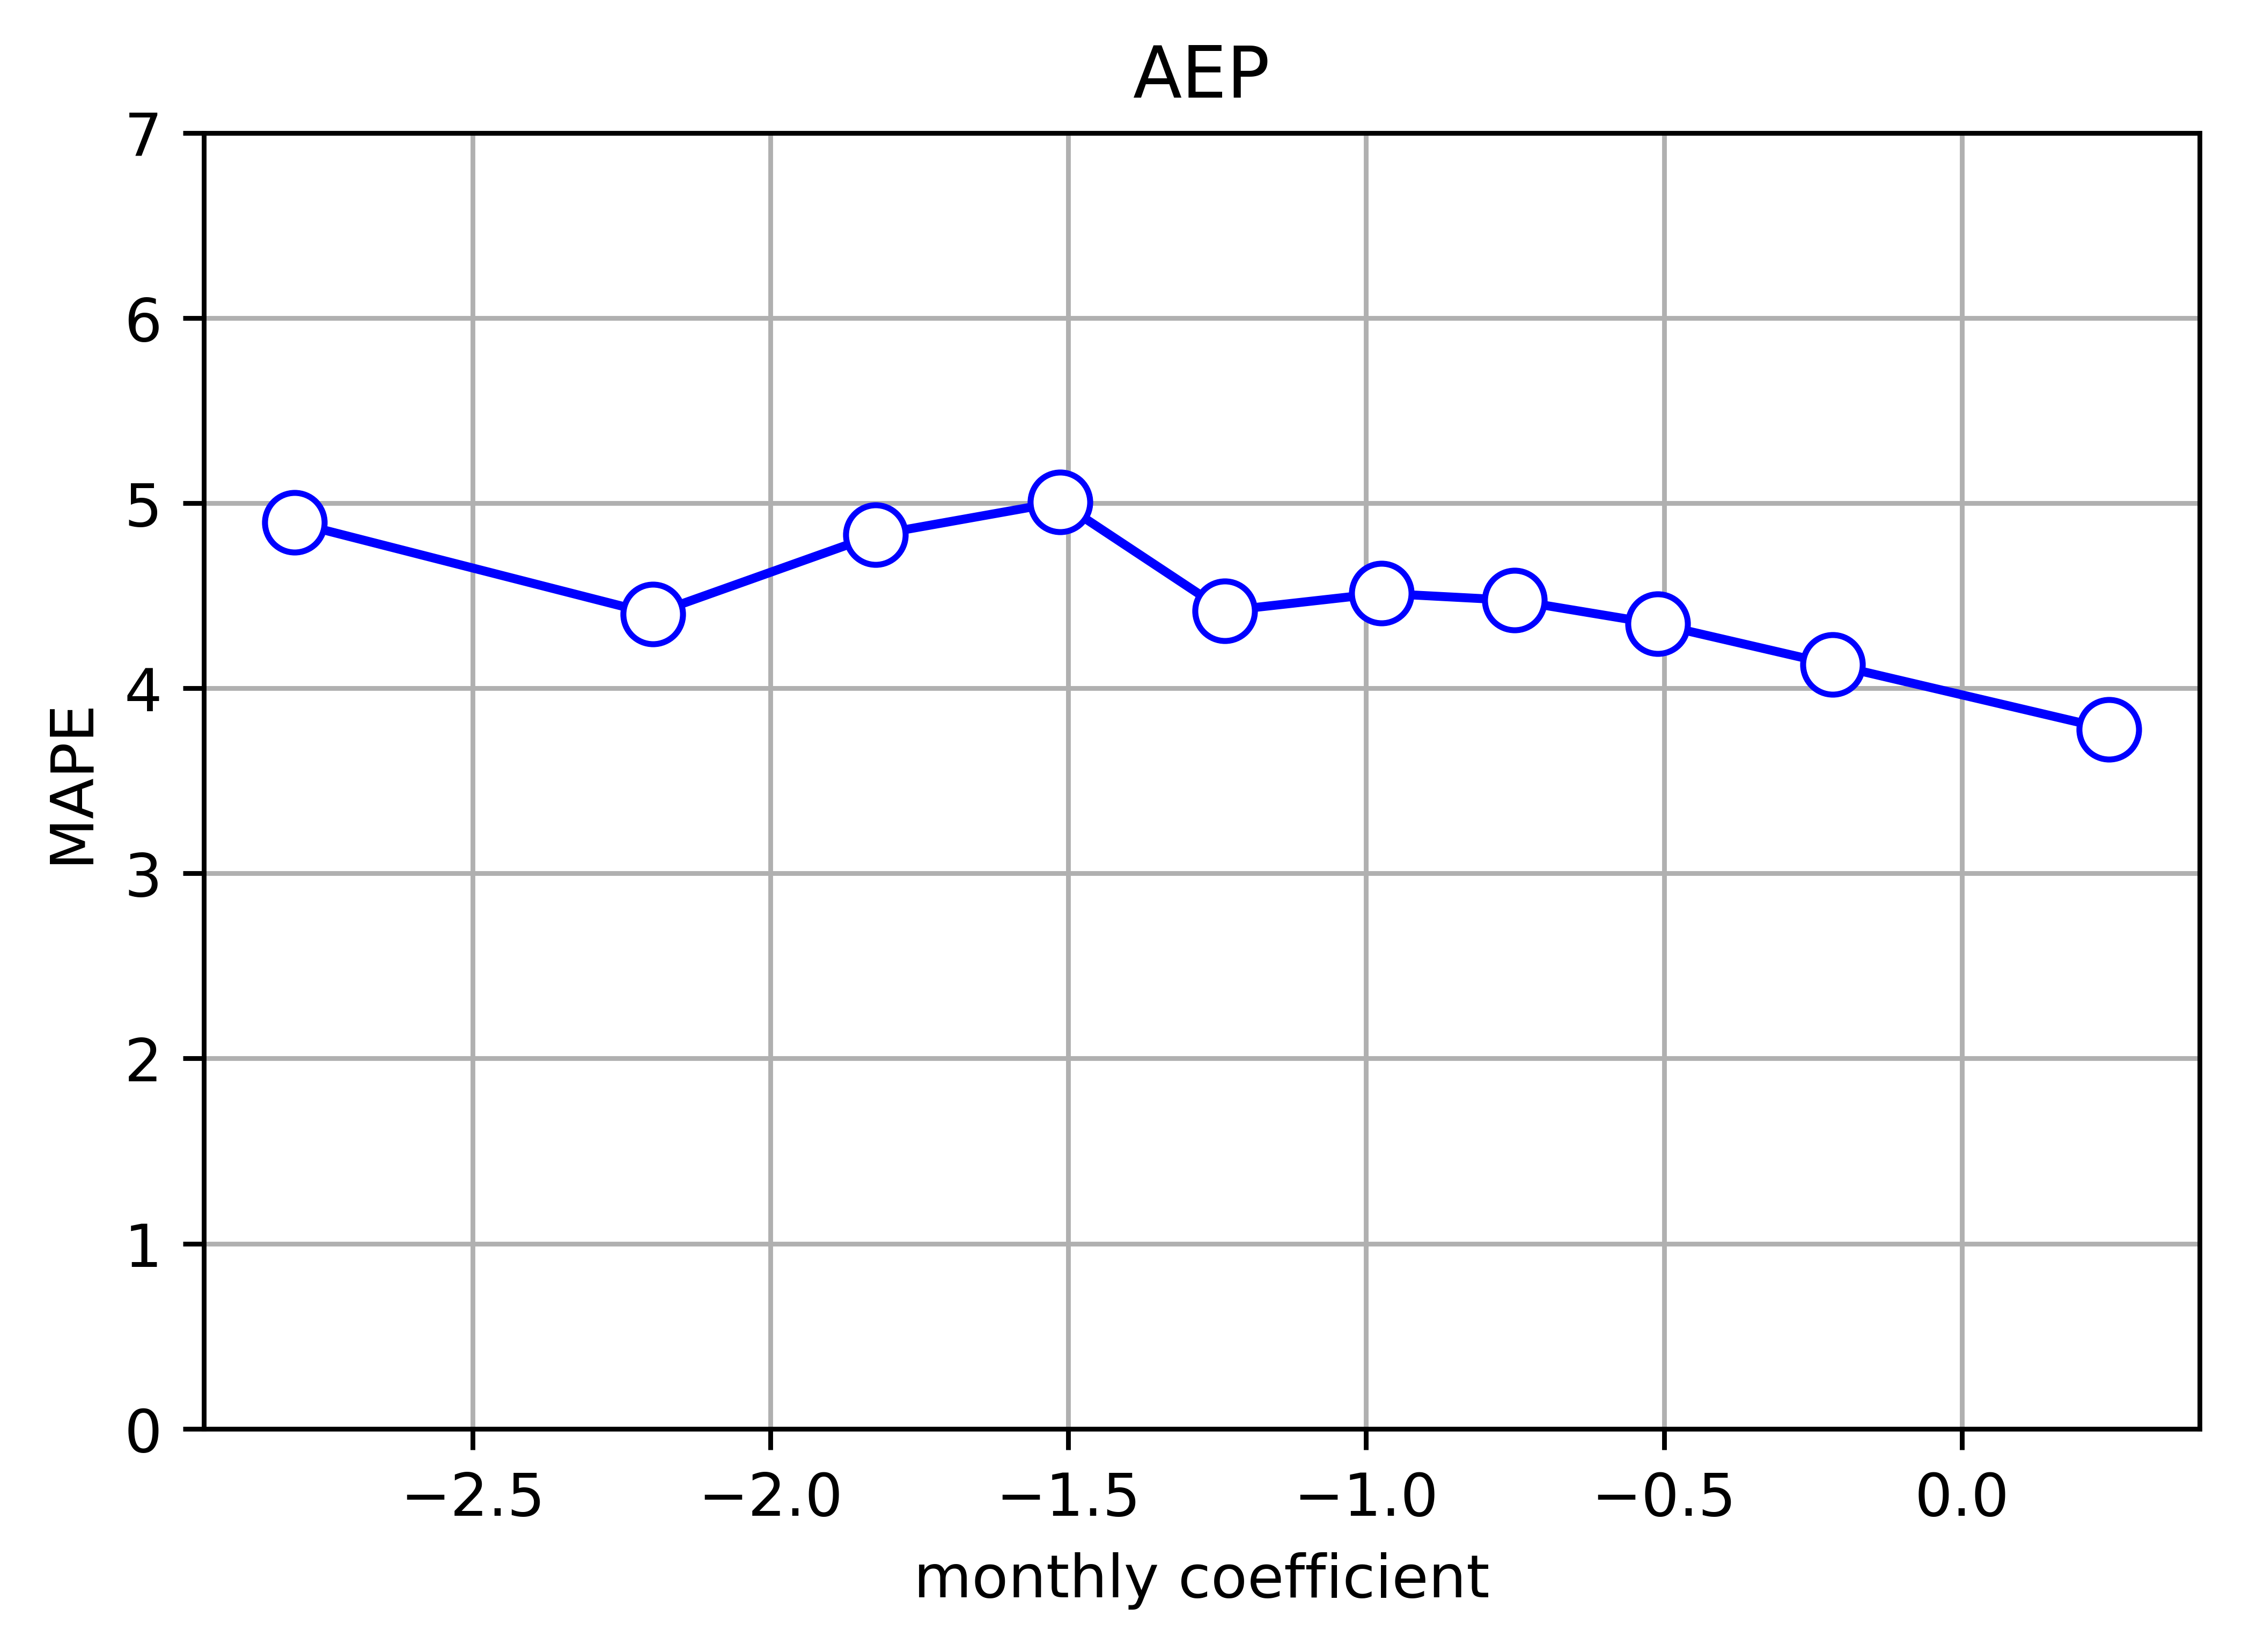

In [293]:
df3_a=df3.sort_values(by='a',ascending=True)
a_df=np.zeros(10,)
mape_df=np.zeros(10,)
for i in range(10):
    juna=df3_a[i*100:100*(i+1)]['a'].values.mean()
    a_df[i]=juna
    junmape=df3_a[i*100:100*(i+1)]['mape'].values.mean()
    mape_df[i]=junmape
plt.figure(dpi=800)
plt.plot(a_df,mape_df,color='b',marker='o',markerfacecolor='white',markersize=10)
plt.title('AEP')
# plt.legend()
plt.xlabel('monthly coefficient')
plt.ylabel('MAPE')
plt.ylim(0,7)
plt.grid()#添加网格
# plt.savefig('../picture/AEP_a.tiff')

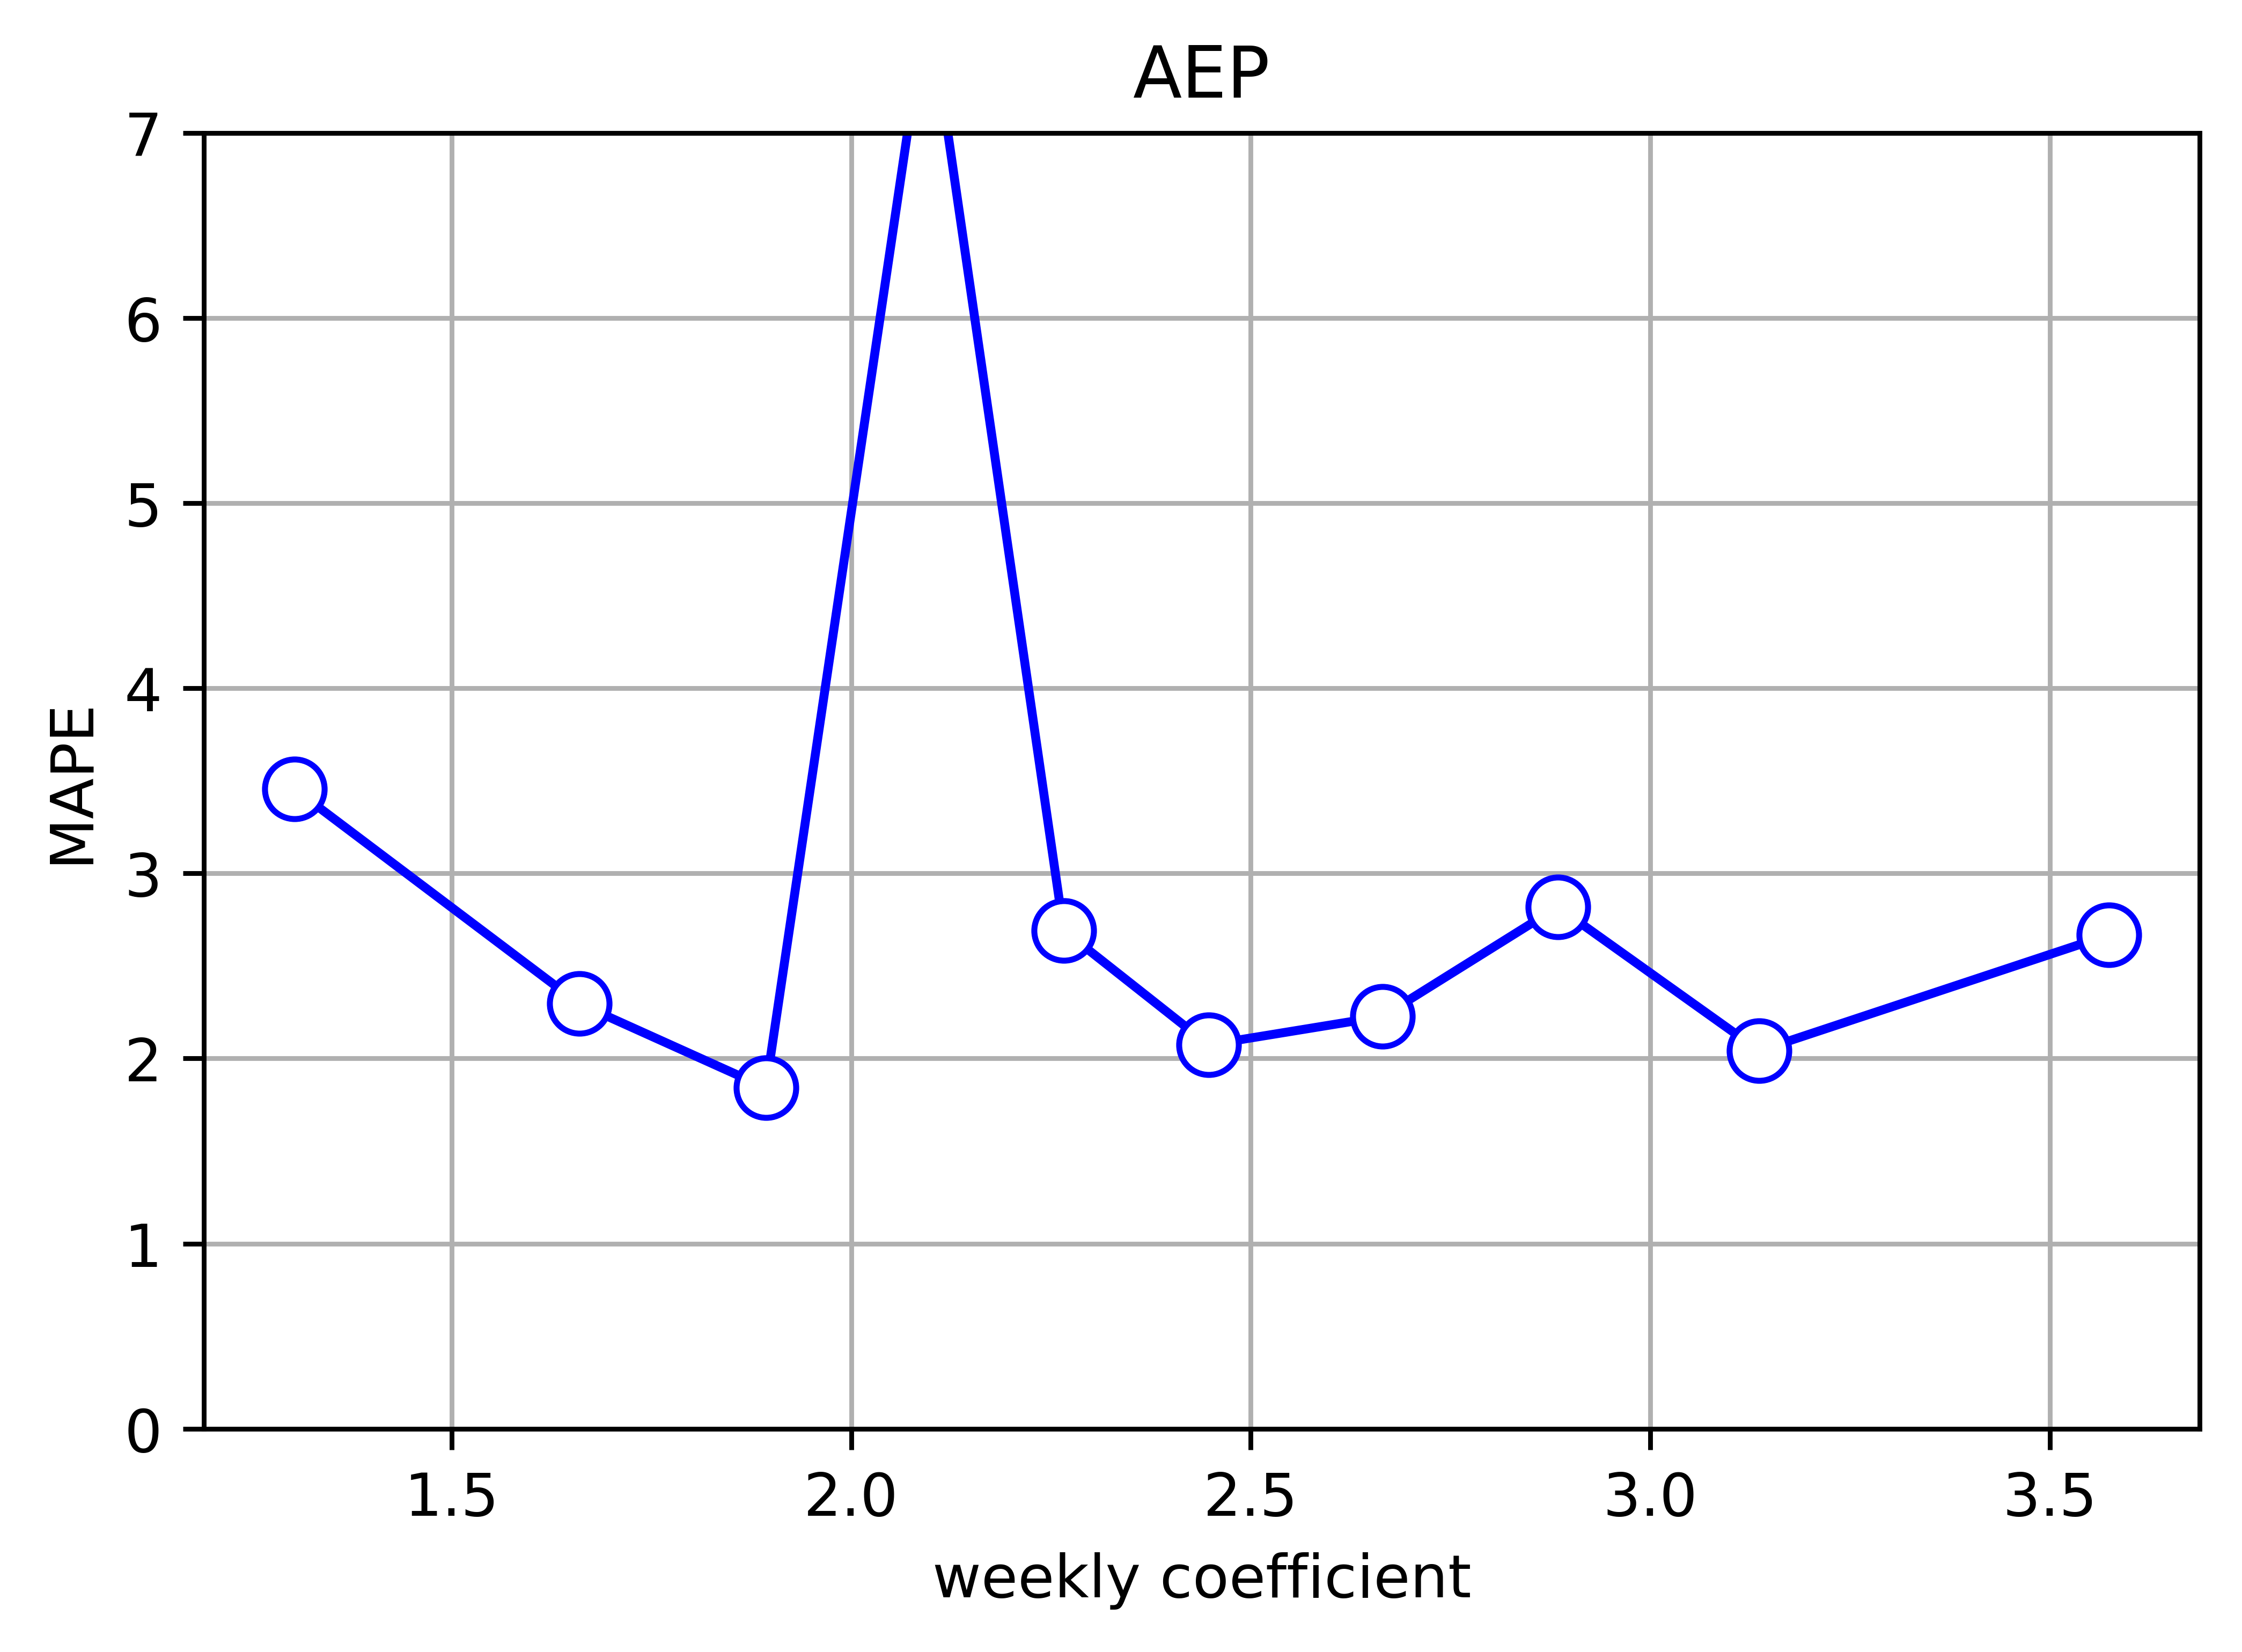

In [36]:
df3_b=df3.sort_values(by='b',ascending=True)
b_df=np.zeros(10,)
b_mape_df=np.zeros(10,)
for i in range(10):
    junb=df3_b[i*100:100*(i+1)]['b'].values.mean()
    b_df[i]=junb
    b_junmape=df3_b[i*100:100*(i+1)]['mape'].values.mean()
    b_mape_df[i]=b_junmape
plt.figure(dpi=800)
plt.plot(b_df,b_mape_df,'b',marker='o',markerfacecolor='white',markersize=10)
plt.title('AEP')
plt.xlabel('weekly coefficient')
plt.ylabel('MAPE')
plt.ylim(0,7)
plt.grid()
# plt.savefig('../picture/AEP_b.tiff')

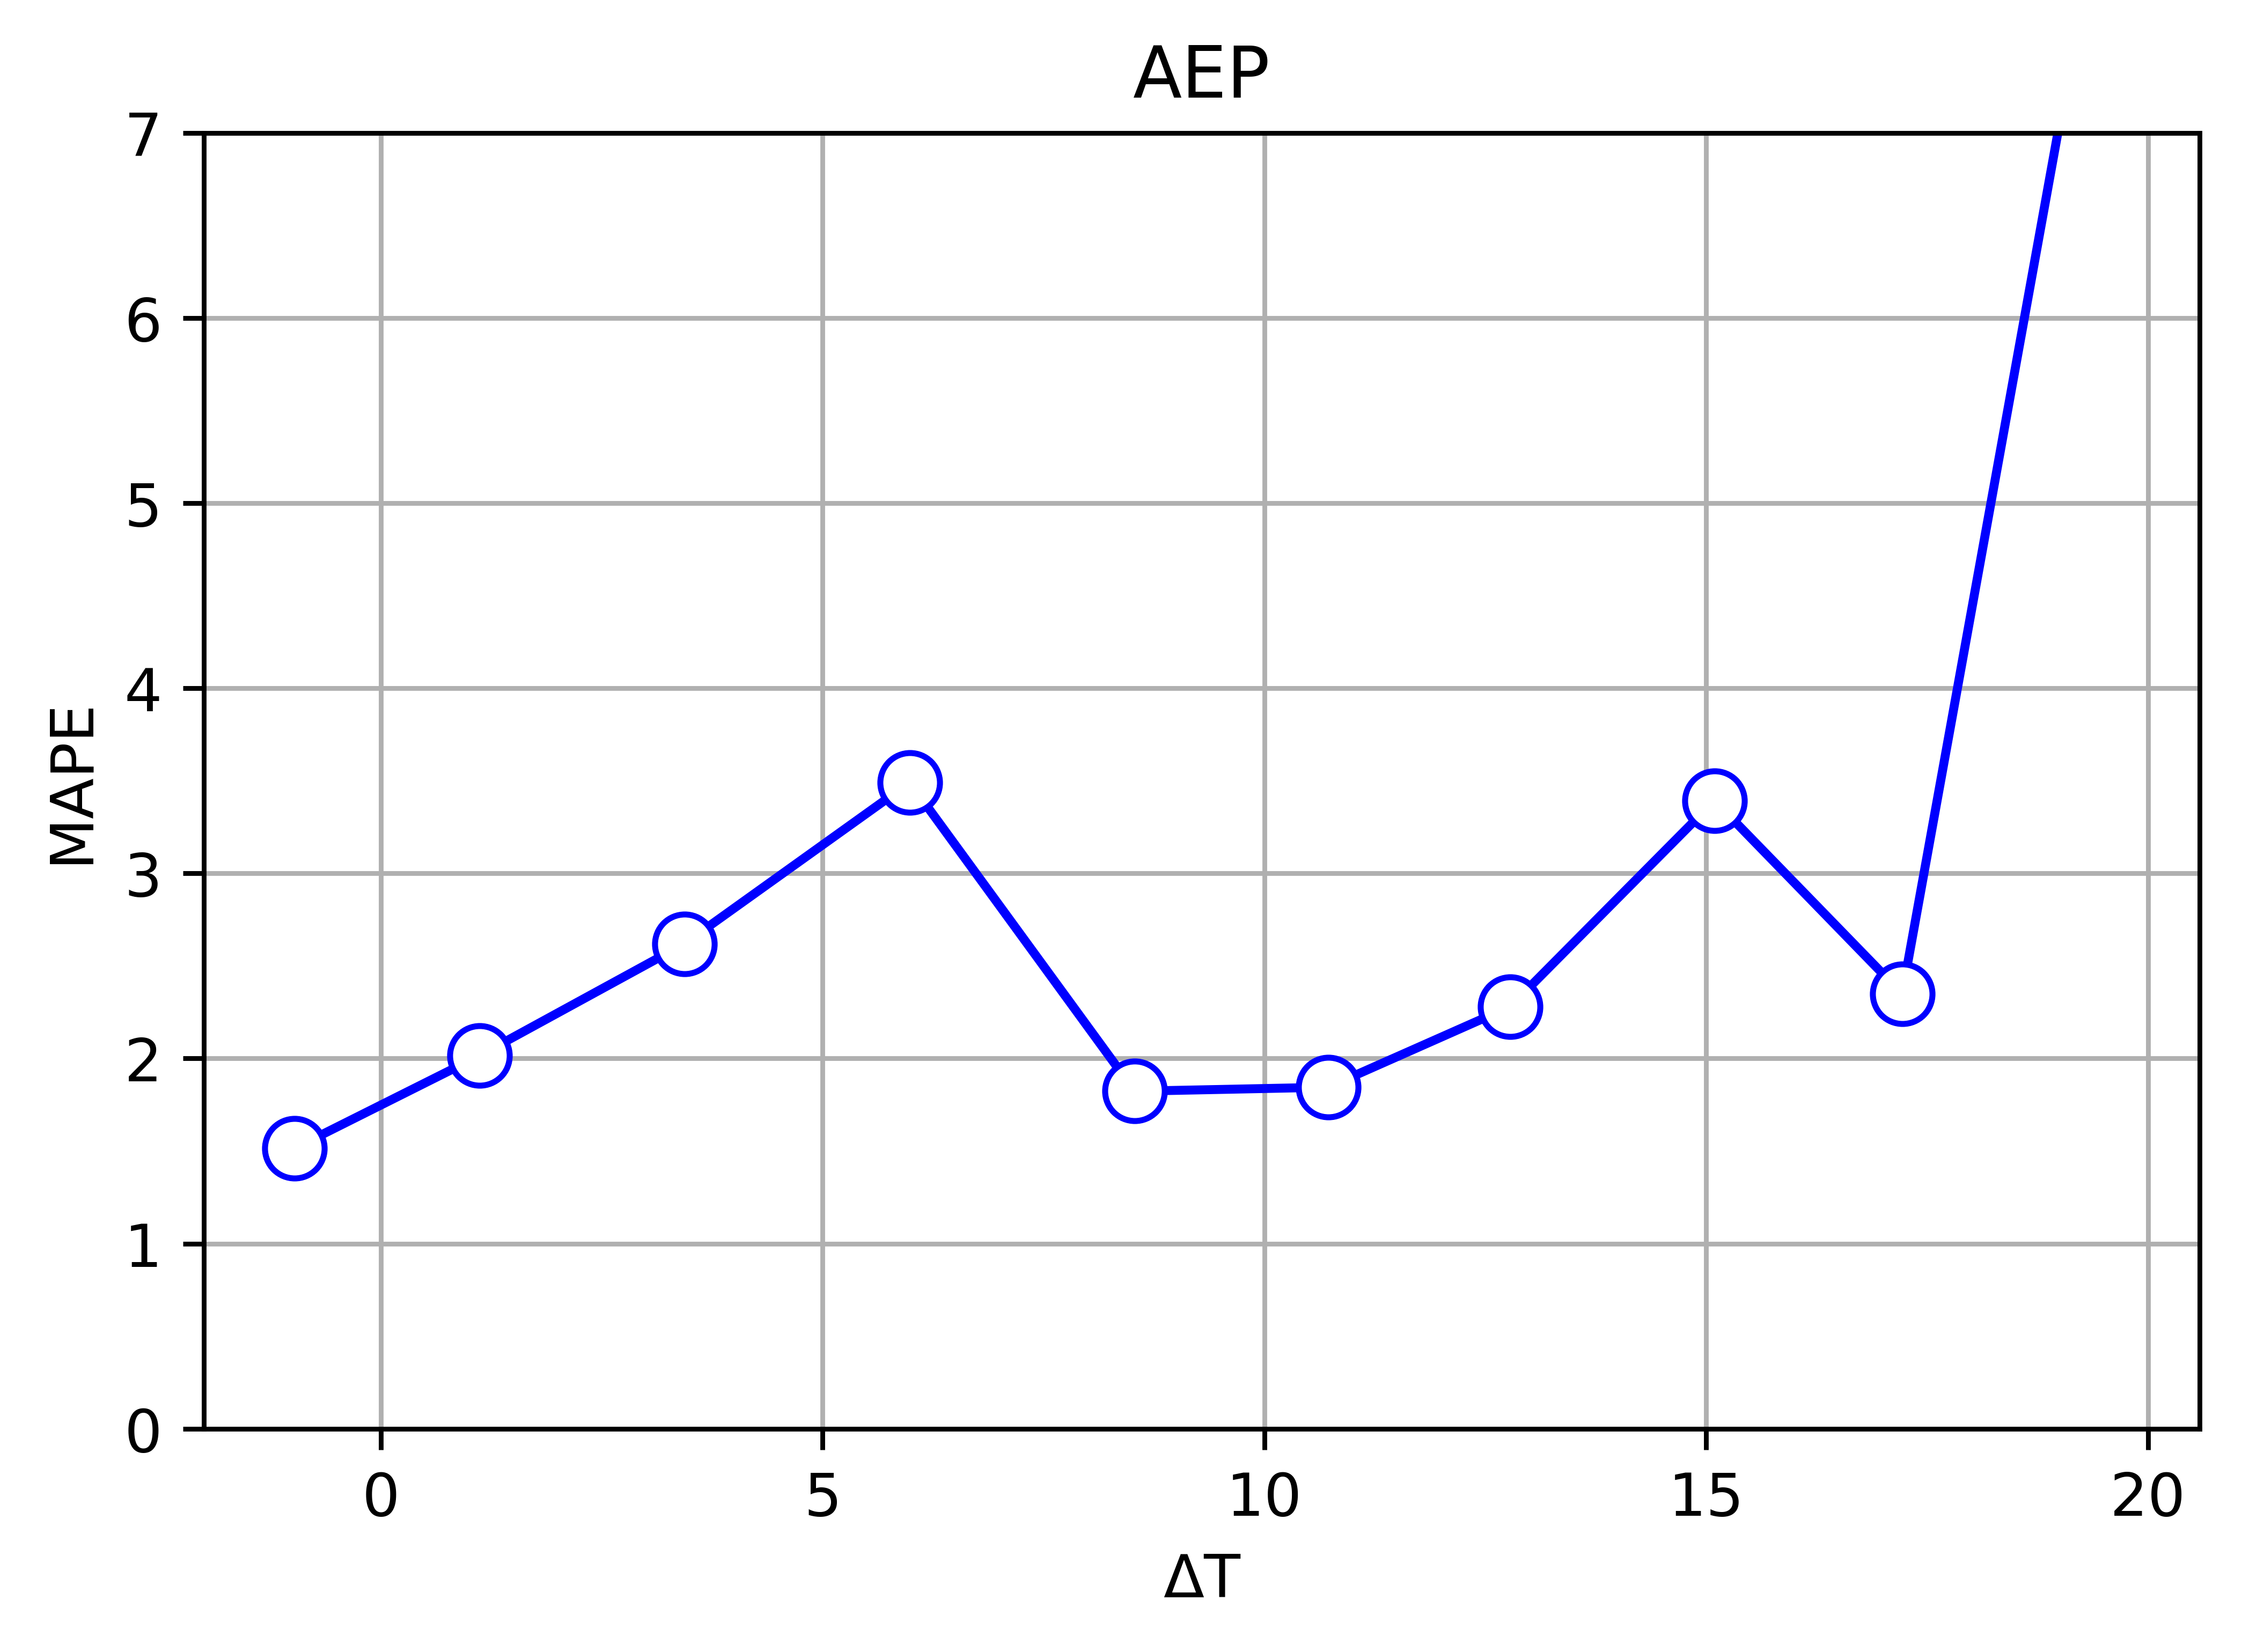

In [37]:
df3_c=df3.sort_values(by='c',ascending=True)
c_df=np.zeros(10,)
c_mape_df=np.zeros(10,)
for i in range(10):
    junc=df3_c[i*100:100*(i+1)]['c'].values.mean()
    c_df[i]=junc
    c_junmape=df3_c[i*100:100*(i+1)]['mape'].values.mean()
    c_mape_df[i]=c_junmape
plt.figure(dpi=800)
plt.plot(c_df,c_mape_df,color='b',marker='o',markerfacecolor='white',markersize=10)
plt.title('AEP')
plt.xlabel('ΔT')
plt.ylabel('MAPE')
plt.ylim(0,7)
plt.grid()#添加网格
# plt.savefig('../picture/AEP_c.tiff')

In [38]:
# plt.figure(dpi=600)
# plt.plot(A_origin,Pre,'b.',label='a_mape')
# plt.legend()
# plt.title('a')
# # plt.savefig('../picture/a_mape.tiff')

In [39]:
# plt.figure(dpi=800)
# plt.plot(B_origin,Pre,'ro')
# # plt.savefig('../picture/b_mape.tiff')

In [40]:
# plt.figure(dpi=800)
# plt.plot(C_origin,Pre,'yo')

# # plt.savefig('../picture/c_mape.tiff')

##  Arima

In [448]:
import pandas as pd
import openpyxl
import numpy as np
import matplotlib.pyplot as plt
import pywt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller

In [449]:
def tagADF(t):
    result = pd.DataFrame(index=[
        "Test Statistic Value", "p-value", "Lags Used",
        "Number of Observations Used",
        "Critical Value(1%)", "Critical Value(5%)", "Critical Value(10%)"
    ], columns=['value'])

    result['value']['Test Statistic Value'] = t[0]
    result['value']['p-value'] = t[1]   #表示多少的概率该序列非平稳
    result['value']['Lags Used'] = t[2]
    result['value']['Number of Observations Used'] = t[3]
    result['value']['Critical Value(1%)'] = t[4]['1%']
    result['value']['Critical Value(5%)'] = t[4]['5%']
    result['value']['Critical Value(10%)'] = t[4]['10%']
    return result

In [450]:
MV=pd.DataFrame(Data[:-7]['MV'])
MV

MV
0    15407.293
1    14430.916
2    15272.795
3    16854.471
4    17092.317
..         ...
315  14577.032
316  14816.103
317  15285.349
318  16425.133
319  16449.618

[320 rows x 1 columns]

In [451]:
adf_Data = adfuller(MV.iloc[:,0])
adf_Data

(-1.598856943378318,
 0.4841676437127802,
 14,
 305,
 {'1%': -3.451973573620699,
  '5%': -2.8710633193086648,
  '10%': -2.5718441306100512},
 5050.495166091847)

In [452]:
diff = MV.diff(1).dropna()

In [453]:
adfdiff = adfuller(diff.iloc[:,0])

In [454]:
#通过传入限定的最大值，得到最佳的p值和q值
order = sm.tsa.arma_order_select_ic(diff,ic=['aic'])['aic_min_order']
print(order)

F:\Anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
F:\Anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated i

(1, 2)


In [455]:

#ARMA模型建模和训练
ARMAmodel = sm.tsa.ARMA(diff, order).fit()

F:\Anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
F:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn

In [456]:
#得到模型评分
delta = ARMAmodel.fittedvalues - diff.iloc[:0]
score = 1- delta.var() / diff.var()


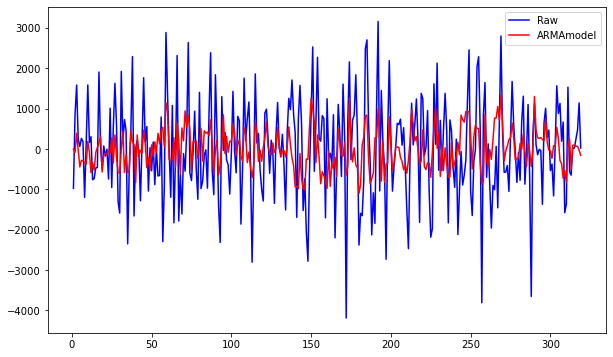

In [457]:
#绘图得到拟合曲线
plt.figure(figsize=(10, 6))
plt.plot(diff, 'b', label='Raw')
plt.plot(ARMAmodel.fittedvalues, 'r', label='ARMAmodel')
plt.legend()
# plt.show()

In [458]:
p = ARMAmodel.forecast(7)[0]

In [459]:
#将差分值进行还原
def revert(diffValues, *lastValue):
    for i in range(len(lastValue)):
        result = []
        lv = lastValue[i]
        for dv in diffValues:
            lv = dv + lv
            result.append(lv)
        diffValues = result
    return diffValues
#需要输入序列的最后一个值
last=MV['MV'][-1:].values.flatten()[0]

In [460]:
tamf=Denoised[-7:]*AEP.std()+AEP.mean()
tamf

array([15300.02086772, 17208.05123731, 17293.9850503 , 16159.85162873,
       18033.11376124, 19496.42891219, 19806.54226249])

In [480]:
mv_p = revert(p,last)
mv_p
mv_r = Data[-7:]['MV'].values.flatten()
# 定义
def MAPE(predict,real):
    mape =sum(abs((predict-real)/real))*100/len(predict)
    return mape

# mape=np.zeros((7,))
# # mv_p[:7]



# plt.figure(dpi=800)
# plt.plot(mv_p,'b',label='ARIMA_P',marker='s',markerfacecolor='white',markersize=10)
# plt.plot(tamf,'r',label='TAMF',marker='o',markerfacecolor='white',markersize=10)
# plt.plot(mv_r,'y',label='TRUE',marker='*',markerfacecolor='white',markersize=10)
# plt.title('A week of error')
# plt.legend(loc="upper left")
# plt.grid()
# plt.savefig('../picture/A Week of error.tiff')

## 基于小波变换的时间序列预测

In [481]:
import pandas as pd
import openpyxl
import numpy as np
import matplotlib.pyplot as plt
import pywt
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARMA

In [482]:
a2,d2,d1=pywt.wavedec(mv[:-7],'db3',mode='sym',level=2)
coeff=[a2,d2,d1]

In [483]:
from scipy.optimize import curve_fit
import math 
def MAPE(predict,real):
    mape =abs((predict-real)/real)/len(predict)
    return mape
def ERROR(predict,real):
    E=(predict-real)/predict
    return E
def MSE(predict,real):
    mse=(predict-real)**2/len(predict)
    return mse

In [484]:
order_a2=sm.tsa.arma_order_select_ic(a2,ic=['aic'])['aic_min_order']
order_d2=sm.tsa.arma_order_select_ic(d2,ic=['aic'])['aic_min_order']
order_d1=sm.tsa.arma_order_select_ic(d1,ic=['aic'])['aic_min_order']

F:\Anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
F:\Anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated i

F:\Anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
F:\Anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated i

F:\Anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
F:\Anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated i

In [485]:
print(order_a2)

(3, 2)


In [486]:
model_a2=ARMA(a2,order_a2)
model_d2=ARMA(d2,order_d2)
model_d1=ARMA(d1,order_d1)

result_a2=model_a2.fit()
result_d2=model_d2.fit()
result_d1=model_d1.fit()

F:\Anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [487]:
plt.figure(figsize=(10,15))

plt.subplot(3,1,1)
plt.plot(a2,'blue')
plt.plot(result_a2.fittedvalues,'red')
plt.subplot(3,1,2)
plt.plot(d1,'blue')
plt.plot(result_d1.fittedvalues,'red')
plt.subplot(3,1,3)
plt.plot(d2,'blue')
plt.plot(result_d2.fittedvalues,'red')

In [488]:
a2_a11,d2_a11,d1_a11 =pywt.wavedec(mv,'db3',mode='sym',level=2)
print(len(a2_a11),len(d2_a11),len(d1_a11))


85 85 166


In [489]:
delta=[len(a2_a11)-len(a2),len(d2_a11)-len(d2),len(d1_a11)-len(d1)]
delta

[2, 2, 4]

In [490]:
pa2=model_a2.predict(params=result_a2.params,start=1,end=len(a2)+delta[0])
pd2=model_d2.predict(params=result_d2.params,start=1,end=len(d2)+delta[1])
pd1=model_d1.predict(params=result_d1.params,start=1,end=len(d1)+delta[2])
print(len(pa2),len(pd2),len(pd1))

85 85 166


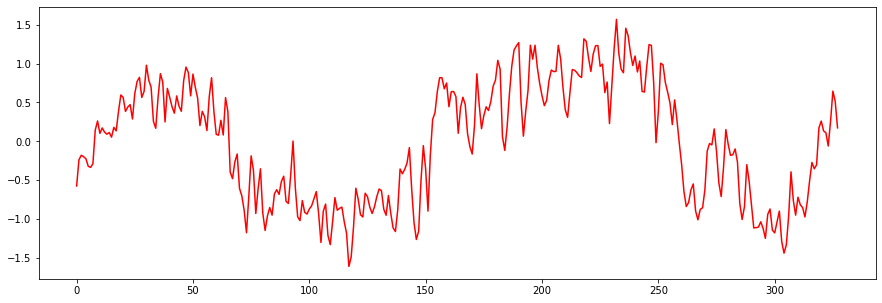

In [505]:
coeff_new=[pa2,pd2,pd1]
# print(coeff_new)
denoised_index = pywt.waverec(coeff_new,"db3")

plt.figure(figsize=(15,5))

plt.plot(denoised_index,'red')

# warima=mape(denoised_index[:-1],mv)
w=np.zeros((327,))
aq=denoised_index[:-1]
# # # # print(w)
# for i in range(327):
#     w[i]=MAPE(aq,mv)
# w

In [ ]:
WARIMA=denoised_index[-8:-1]*AEP.std()+AEP.mean()  

<Figure size 4800x3200 with 0 Axes>

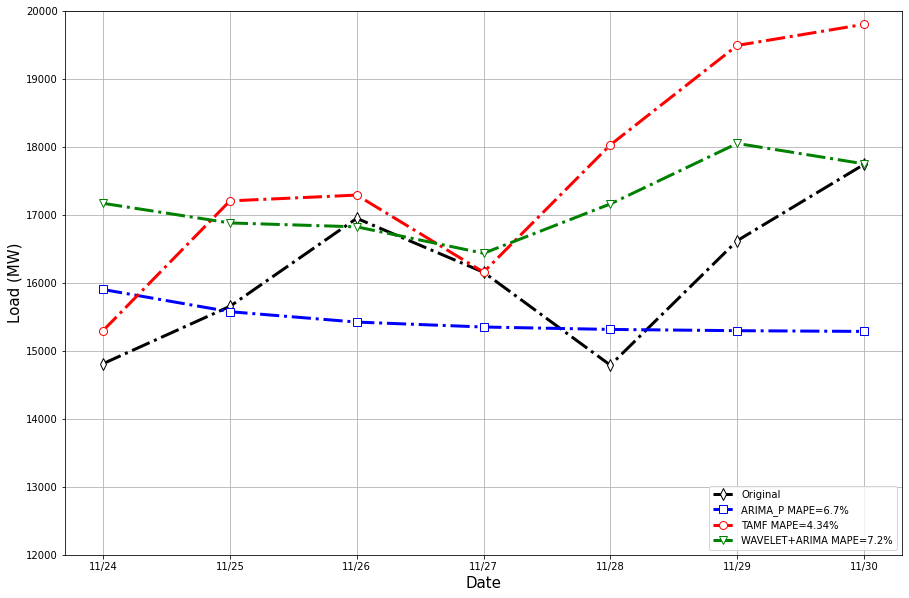

In [492]:
plt.figure(dpi=800)
ax=plt.figure(figsize=(15,10))
plt.plot(mv_r,'black',label='Original',linestyle='-.',linewidth=3.0,marker='d',markerfacecolor='white',markersize=8)
plt.plot(mv_p,'b',linestyle='-.',linewidth=3.0,label='ARIMA_P MAPE=6.7%',marker='s',markerfacecolor='white',markersize=8)
plt.plot(tamf,'r',label='TAMF MAPE=4.34%',linestyle='-.',linewidth=3.0,marker='o',markerfacecolor='white',markersize=8)
plt.plot(WARIMA,'g',label='WAVELET+ARIMA MAPE=7.2%',linestyle='-.',linewidth=3.0,marker='v',markerfacecolor='white',markersize=8)
# plt.title('A week of error')
plt.legend(loc="lower right")
xticks=[0,1,2,3,4,5,6]
xticklabes = ['11/24', '11/25', '11/26', '11/27',  '11/28', '11/29', '11/30']
plt.xticks(xticks, xticklabes, size=10, color='black')
plt.xlabel('Date', size=15)
plt.ylabel('Load (MW)', size=15)
# plt.text(2.5,tamf[1]+1500,'MAPE=5.9%',size=20,color='r')
# plt.text(2.5,WARIMA[1]+500,'MAPE=7.2%',size=20,color='g')
# plt.text(2.5,mv_p[2]-1500,'MAPE=6.7%',size=20,color='b')
plt.ylim(12000,20000)
plt.grid()
# plt.savefig('../picture/AEP.tiff')

In [504]:
def MAPE(predict,real):
    mape =sum(abs((predict-real)/real))/len(predict)*100
    return mape
arimamape=np.zeros((7,))
tamfmape=np.zeros((7,))
warimamape=np.zeros((7,))
for i in range(7):
    arimamape[i]=MAPE(mv_p[:i+1],mv_r[:i+1])
    tamfmape[i]=MAPE(tamf[:i+1],mv_r[:i+1])
    warimamape[i]=MAPE(WARIMA[:i+1],mv_r[:i+1])
ddf=pd.DataFrame({'ARIMA':arimamape,"TAMF":tamfmape,"WARIMA":warimamape})
# ddf.to_csv('AEP.csv')
tamf


array([15300.02086772, 17208.05123731, 17293.9850503 , 16159.85162873,
       18033.11376124, 19496.42891219, 19806.54226249])

In [570]:
aep=list(mv)
for i in range(len(Denoised[-7:])):
    aep.append(Denoised[-7:][i])
ape=np.array(aep)
plt.figure(dpi=600)
plt.plot(ape,'b')
plt.grid()
plt.ylim(-4,4)
plt.savefig('aep.tiff')